In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sie import *

## Shoe size data

In [2]:
data=load_data('data/shoesize.xls')

In [3]:
data.head()

,Index,Gender,Size,Height
0,1,F,5.5,60.0
1,2,F,6.0,60.0
2,3,F,7.0,60.0
3,4,F,8.0,60.0
4,5,F,8.0,60.0


### Get a subset

In [4]:
import random

In [5]:
random.seed(102)
rows = random.sample(data.index, 10)
newdata=data.ix[rows]
data=newdata
data

,Index,Gender,Size,Height
60,61,F,7.0,64
251,252,M,9.0,70
69,70,F,8.0,64
290,291,M,11.0,71
247,248,M,12.0,69
156,157,F,9.5,68
231,232,M,10.0,69
17,18,F,6.5,61
216,217,M,10.0,68
252,253,M,9.0,70


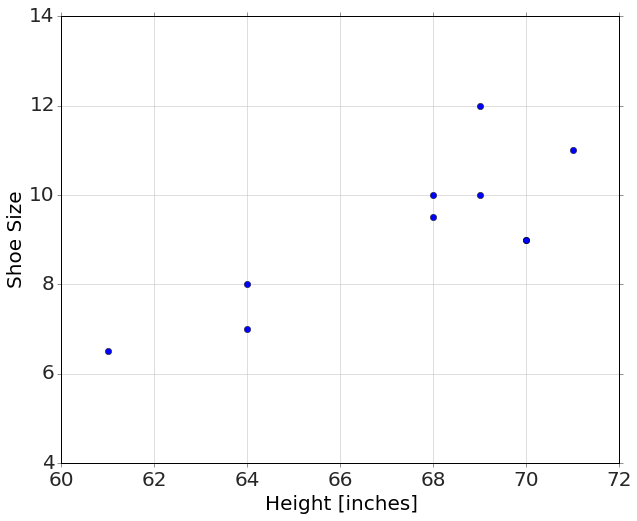

In [7]:
plot(data['Height'],data['Size'],'o')
gca().set_xlim([60,72])
gca().set_ylim([4,14])
xlabel('Height [inches]')
ylabel('Shoe Size')

### Do the regression

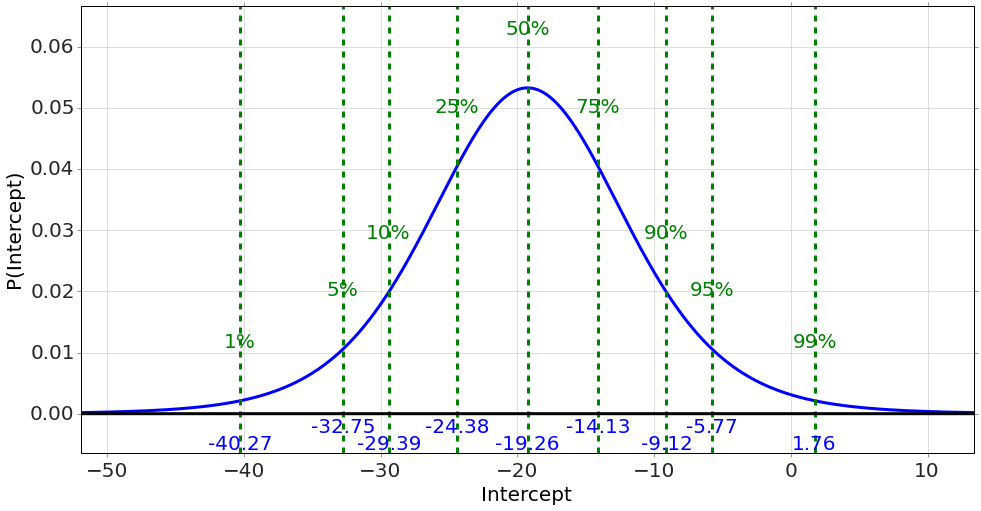

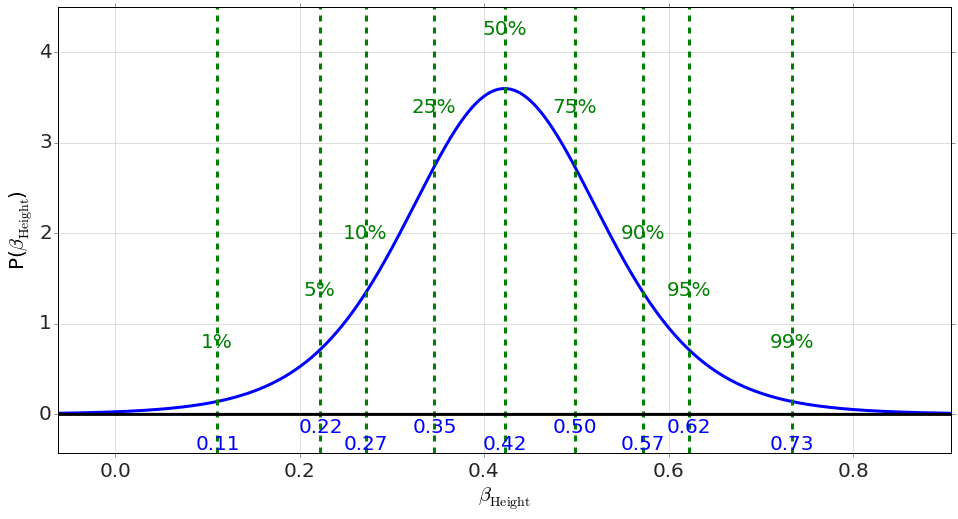

In [8]:
result=regression('Size ~ Height',data)

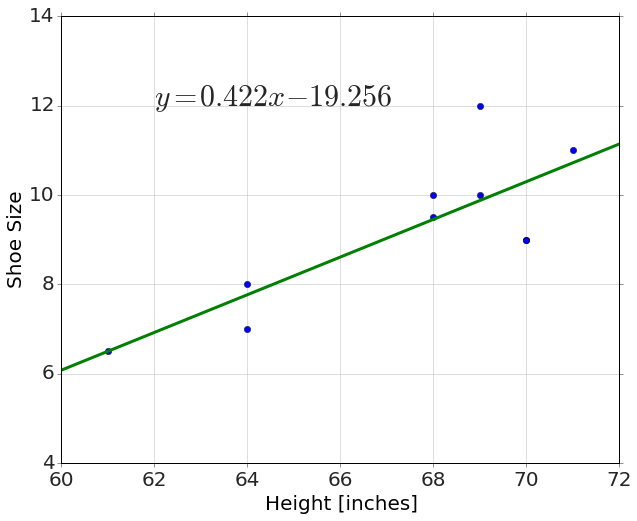

In [10]:
plot(data['Height'],data['Size'],'o')

h=linspace(60,72,10)
plot(h,result['_Predict'](Height=h),'-')

gca().set_xlim([60,72])
gca().set_ylim([4,14])
xlabel('Height [inches]')
ylabel('Shoe Size')

b=result.Intercept.mean()
m=result.Height.mean()

if b>0:
    text(62,12,'$y=%.3f x + %.3f$' % (m,b),fontsize=30)
else:
    text(62,12,'$y=%.3f x %.3f$' % (m,b),fontsize=30)

## SAT Data

In [12]:
data=load_data('data/sat.csv')

### Simple Linear Regression

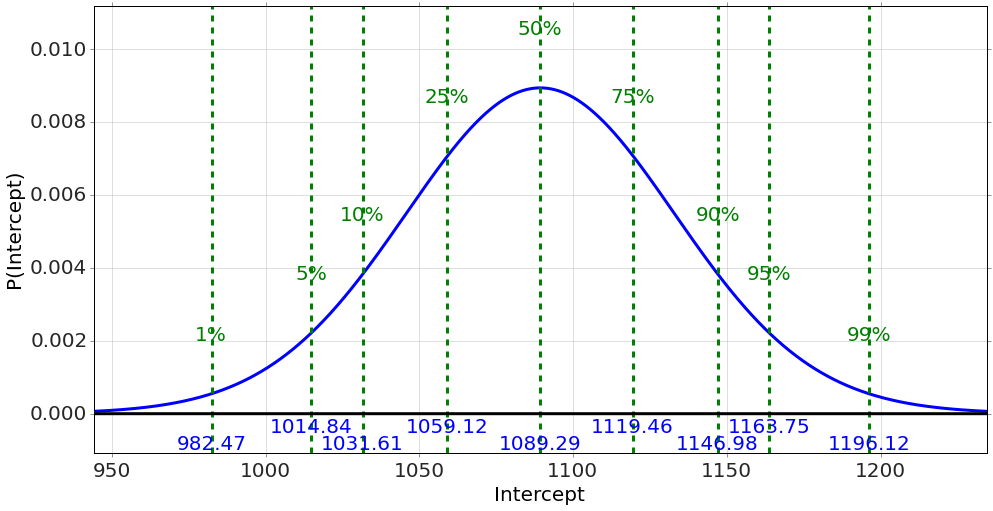

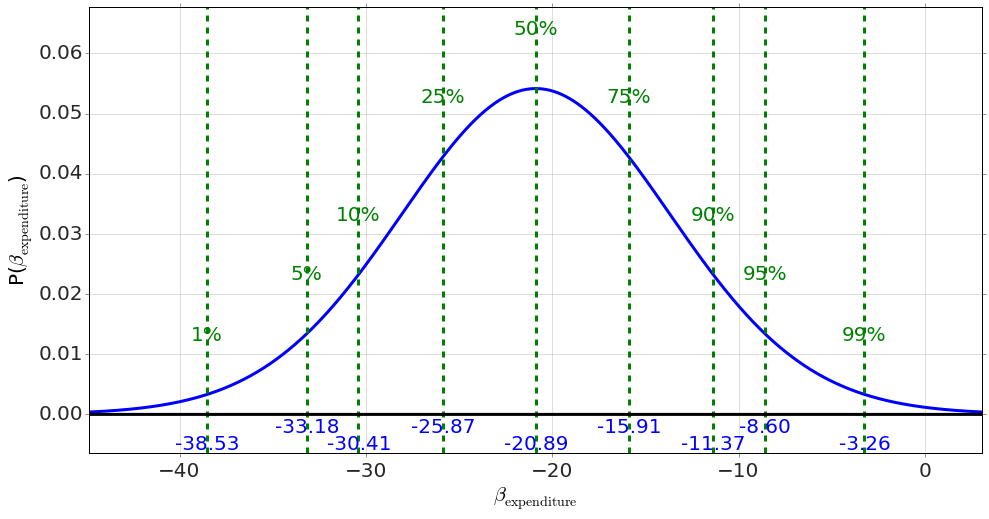

In [13]:
result=regression('total ~ expenditure',data)

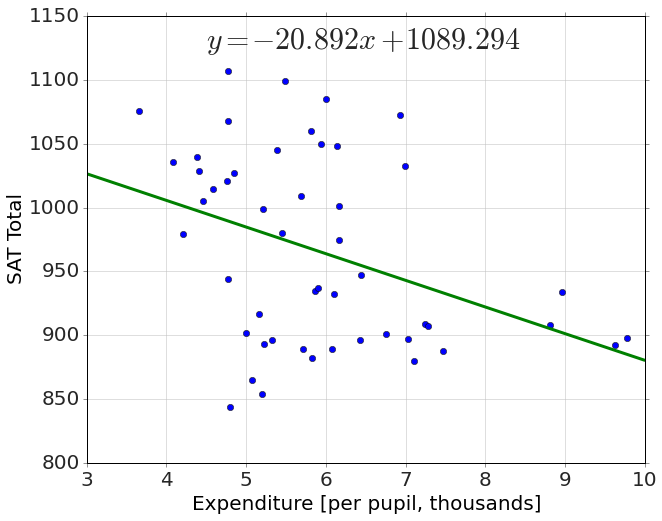

In [15]:
plot(data['expenditure'],data['total'],'o')
xlabel('Expenditure [per pupil, thousands]')
ylabel('SAT Total')
h=linspace(3,10,10)
plot(h,result['_Predict'](expenditure=h),'-')

b=result.Intercept.mean()
m=result.expenditure.mean()

if b>0:
    text(4.5,1125,'$y=%.3f x + %.3f$' % (m,b),fontsize=30)
else:
    text(4.5,1125,'$y=%.3f x %.3f$' % (m,b),fontsize=30)


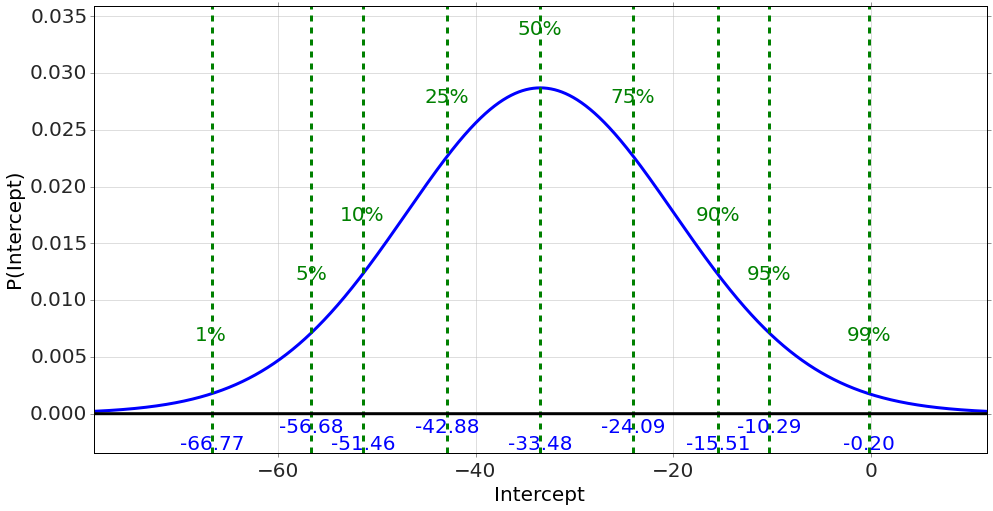

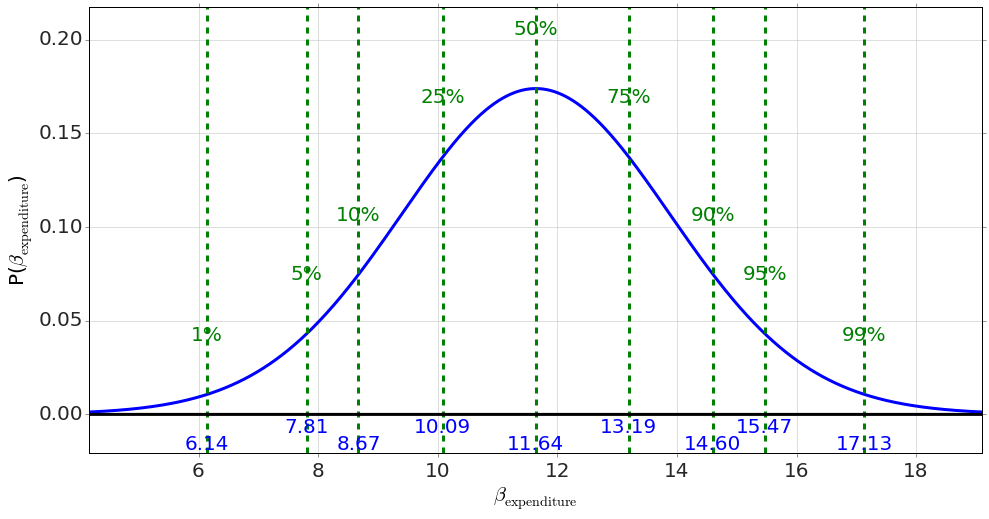

In [16]:
result=regression('percent_taking ~ expenditure',data)

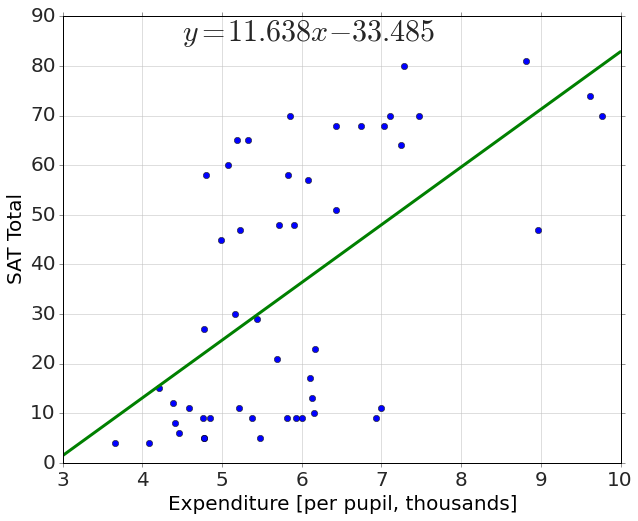

In [19]:
plot(data['expenditure'],data['percent_taking'],'o')
xlabel('Expenditure [per pupil, thousands]')
ylabel('SAT Total')
h=linspace(3,10,10)
plot(h,result['_Predict'](expenditure=h),'-')

b=result.Intercept.mean()
m=result.expenditure.mean()

if b>0:
    text(4.5,85,'$y=%.3f x + %.3f$' % (m,b),fontsize=30)
else:
    text(4.5,85,'$y=%.3f x %.3f$' % (m,b),fontsize=30)


### Multiple Regression

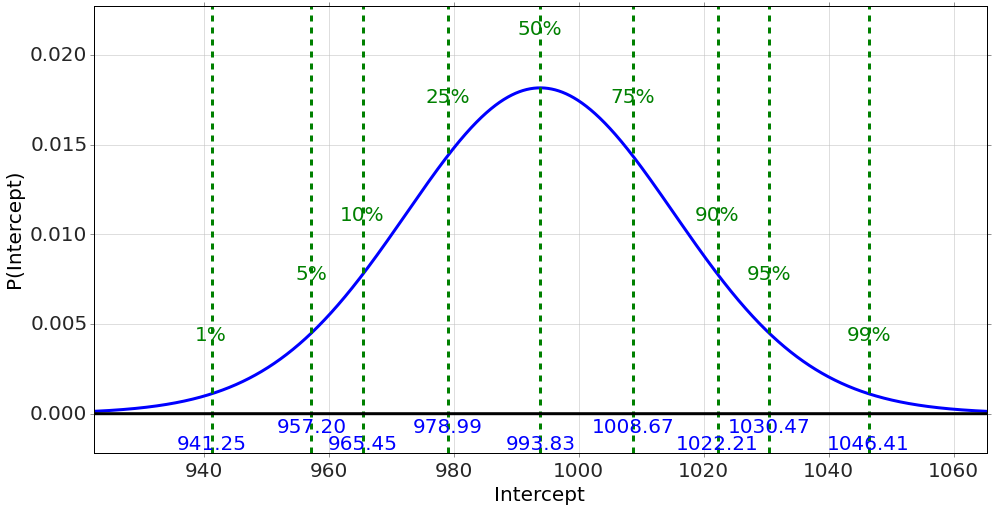

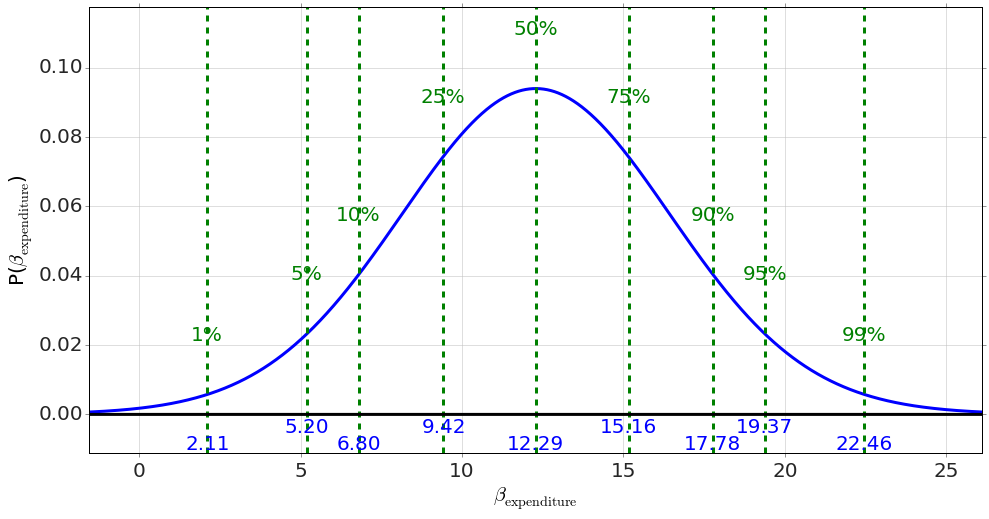

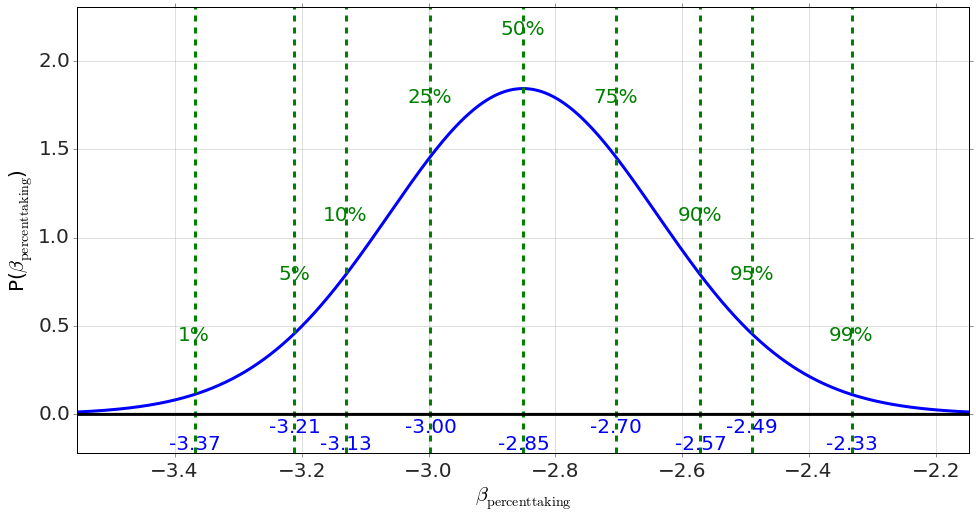

In [20]:
result=regression('total ~ expenditure + percent_taking',data)

## Polynomial Regresssion

In [13]:
data=load_data('data/cars.csv')

In [14]:
data.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


Text(0.5,0,'Speed (mph)')

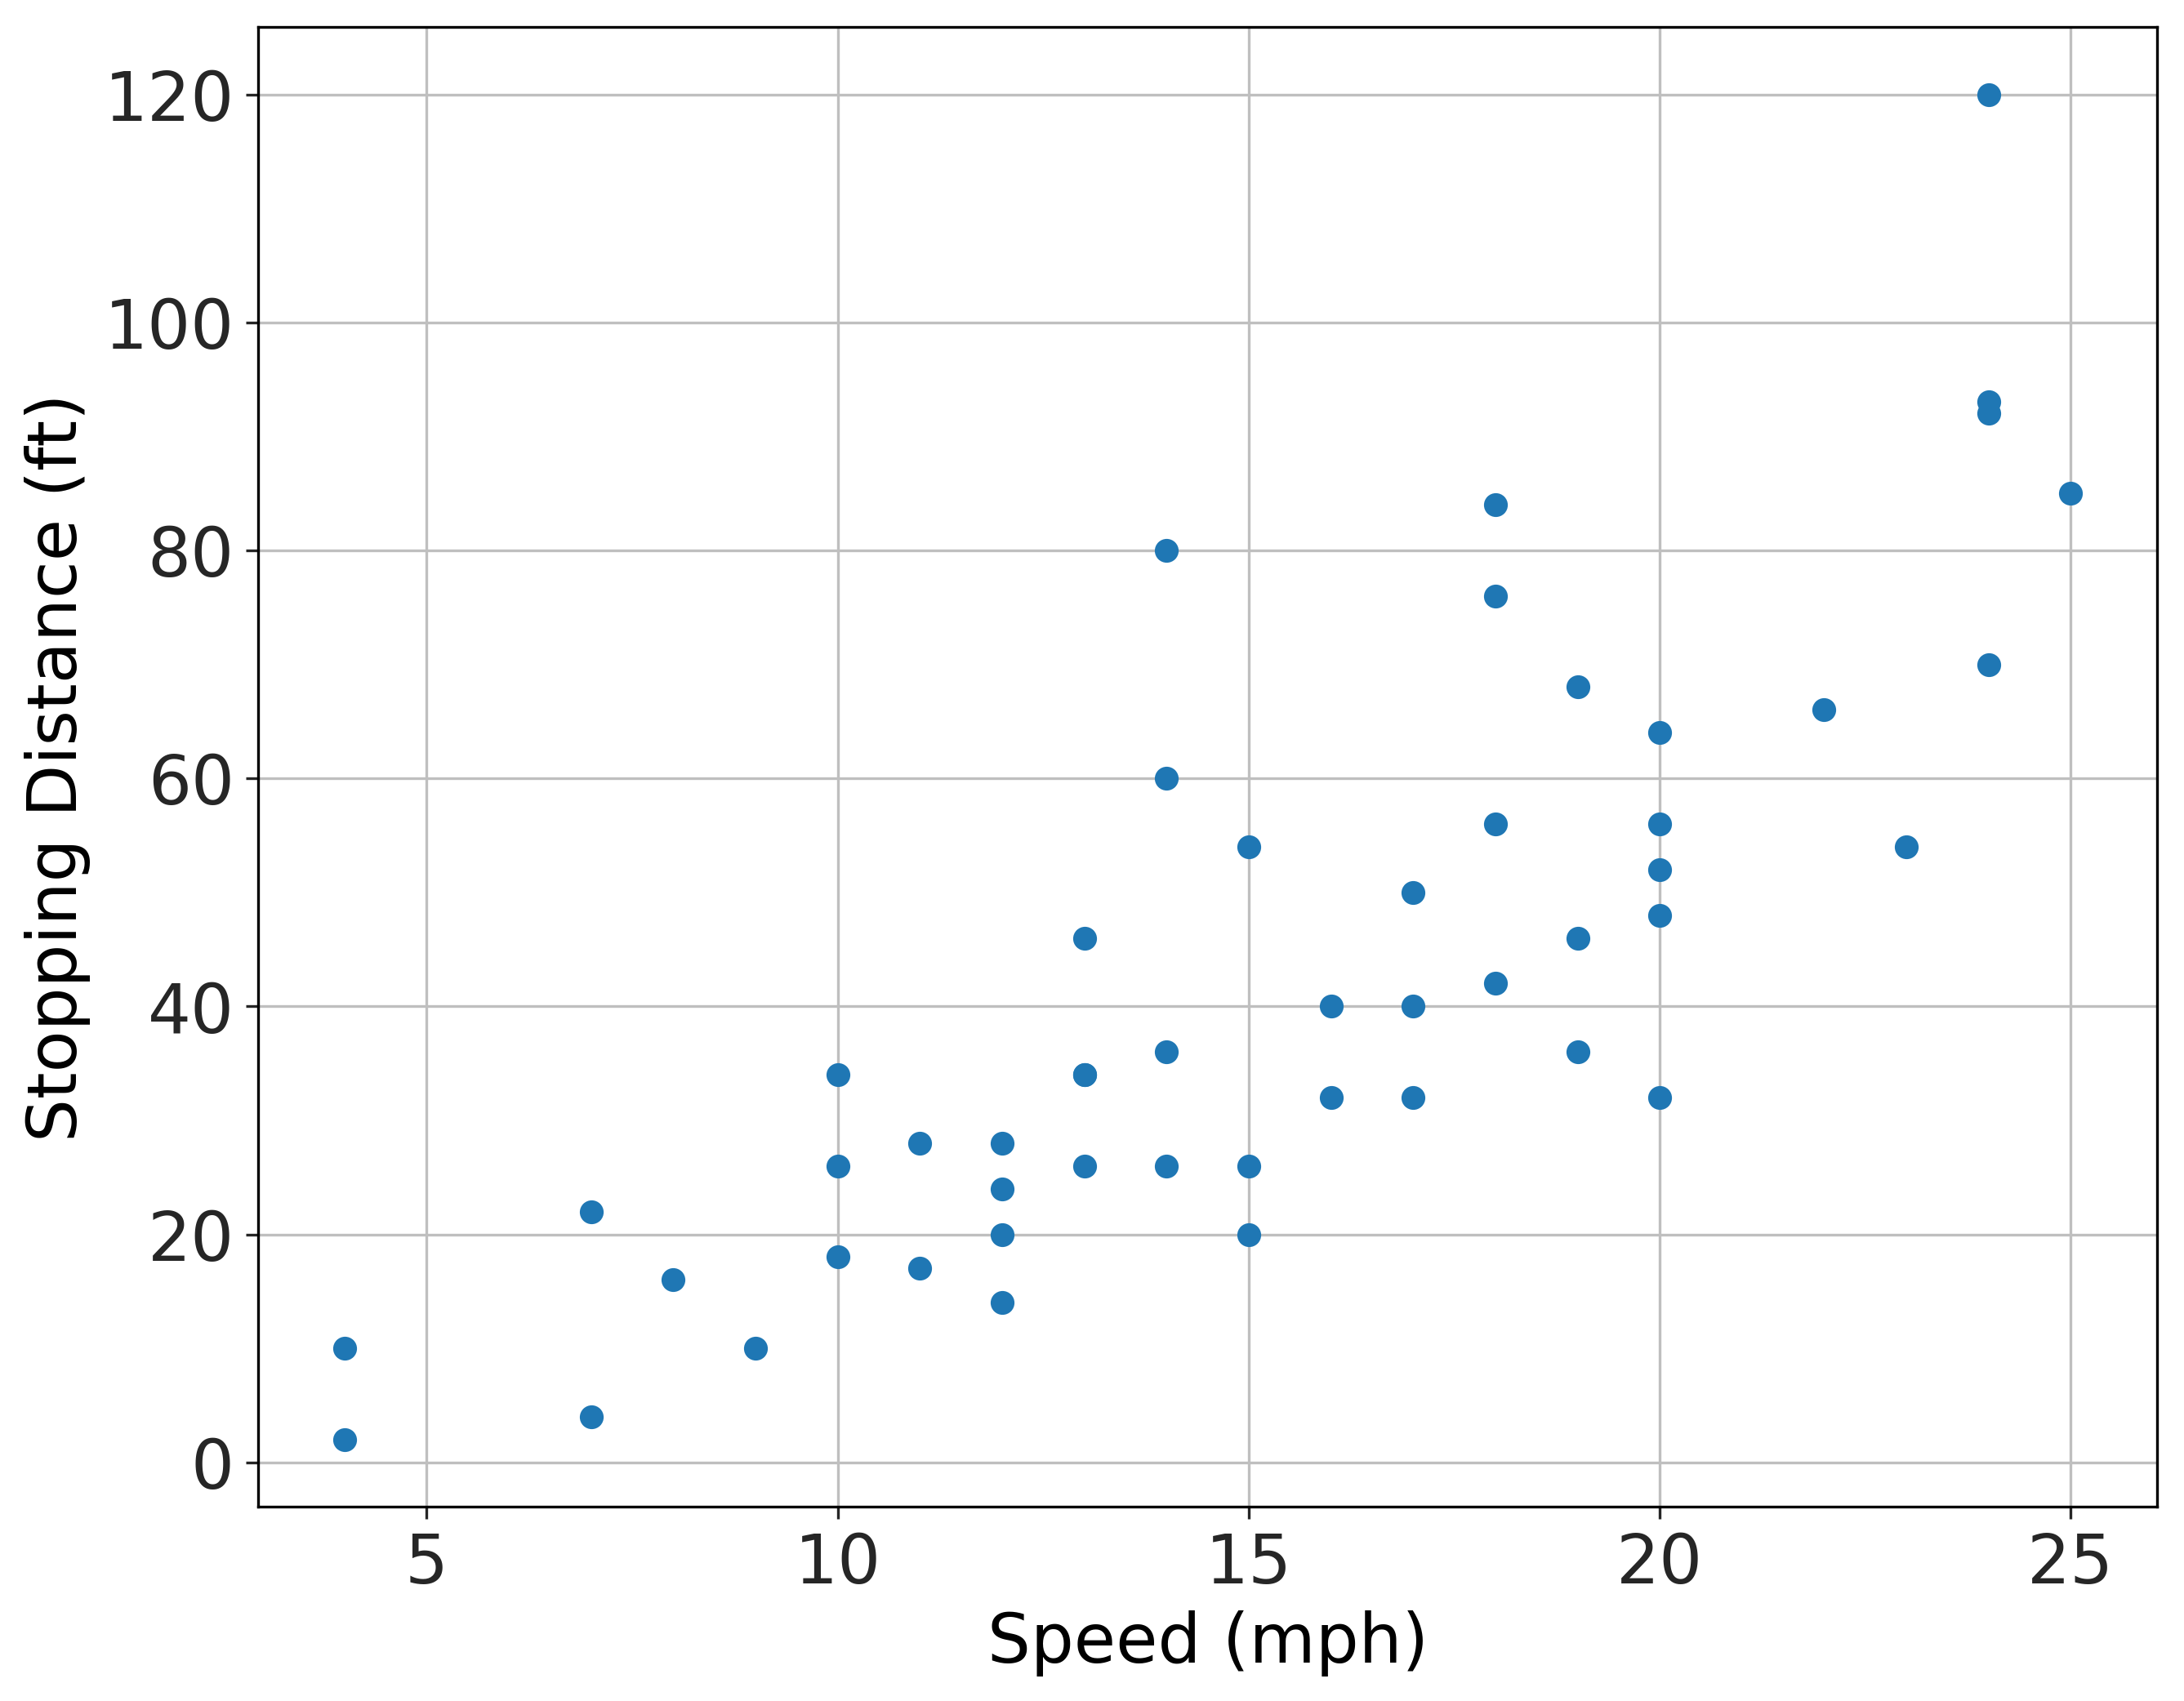

In [15]:
plot(data['speed'],data['dist'],'o')
ylabel('Stopping Distance (ft)')
xlabel('Speed (mph)')

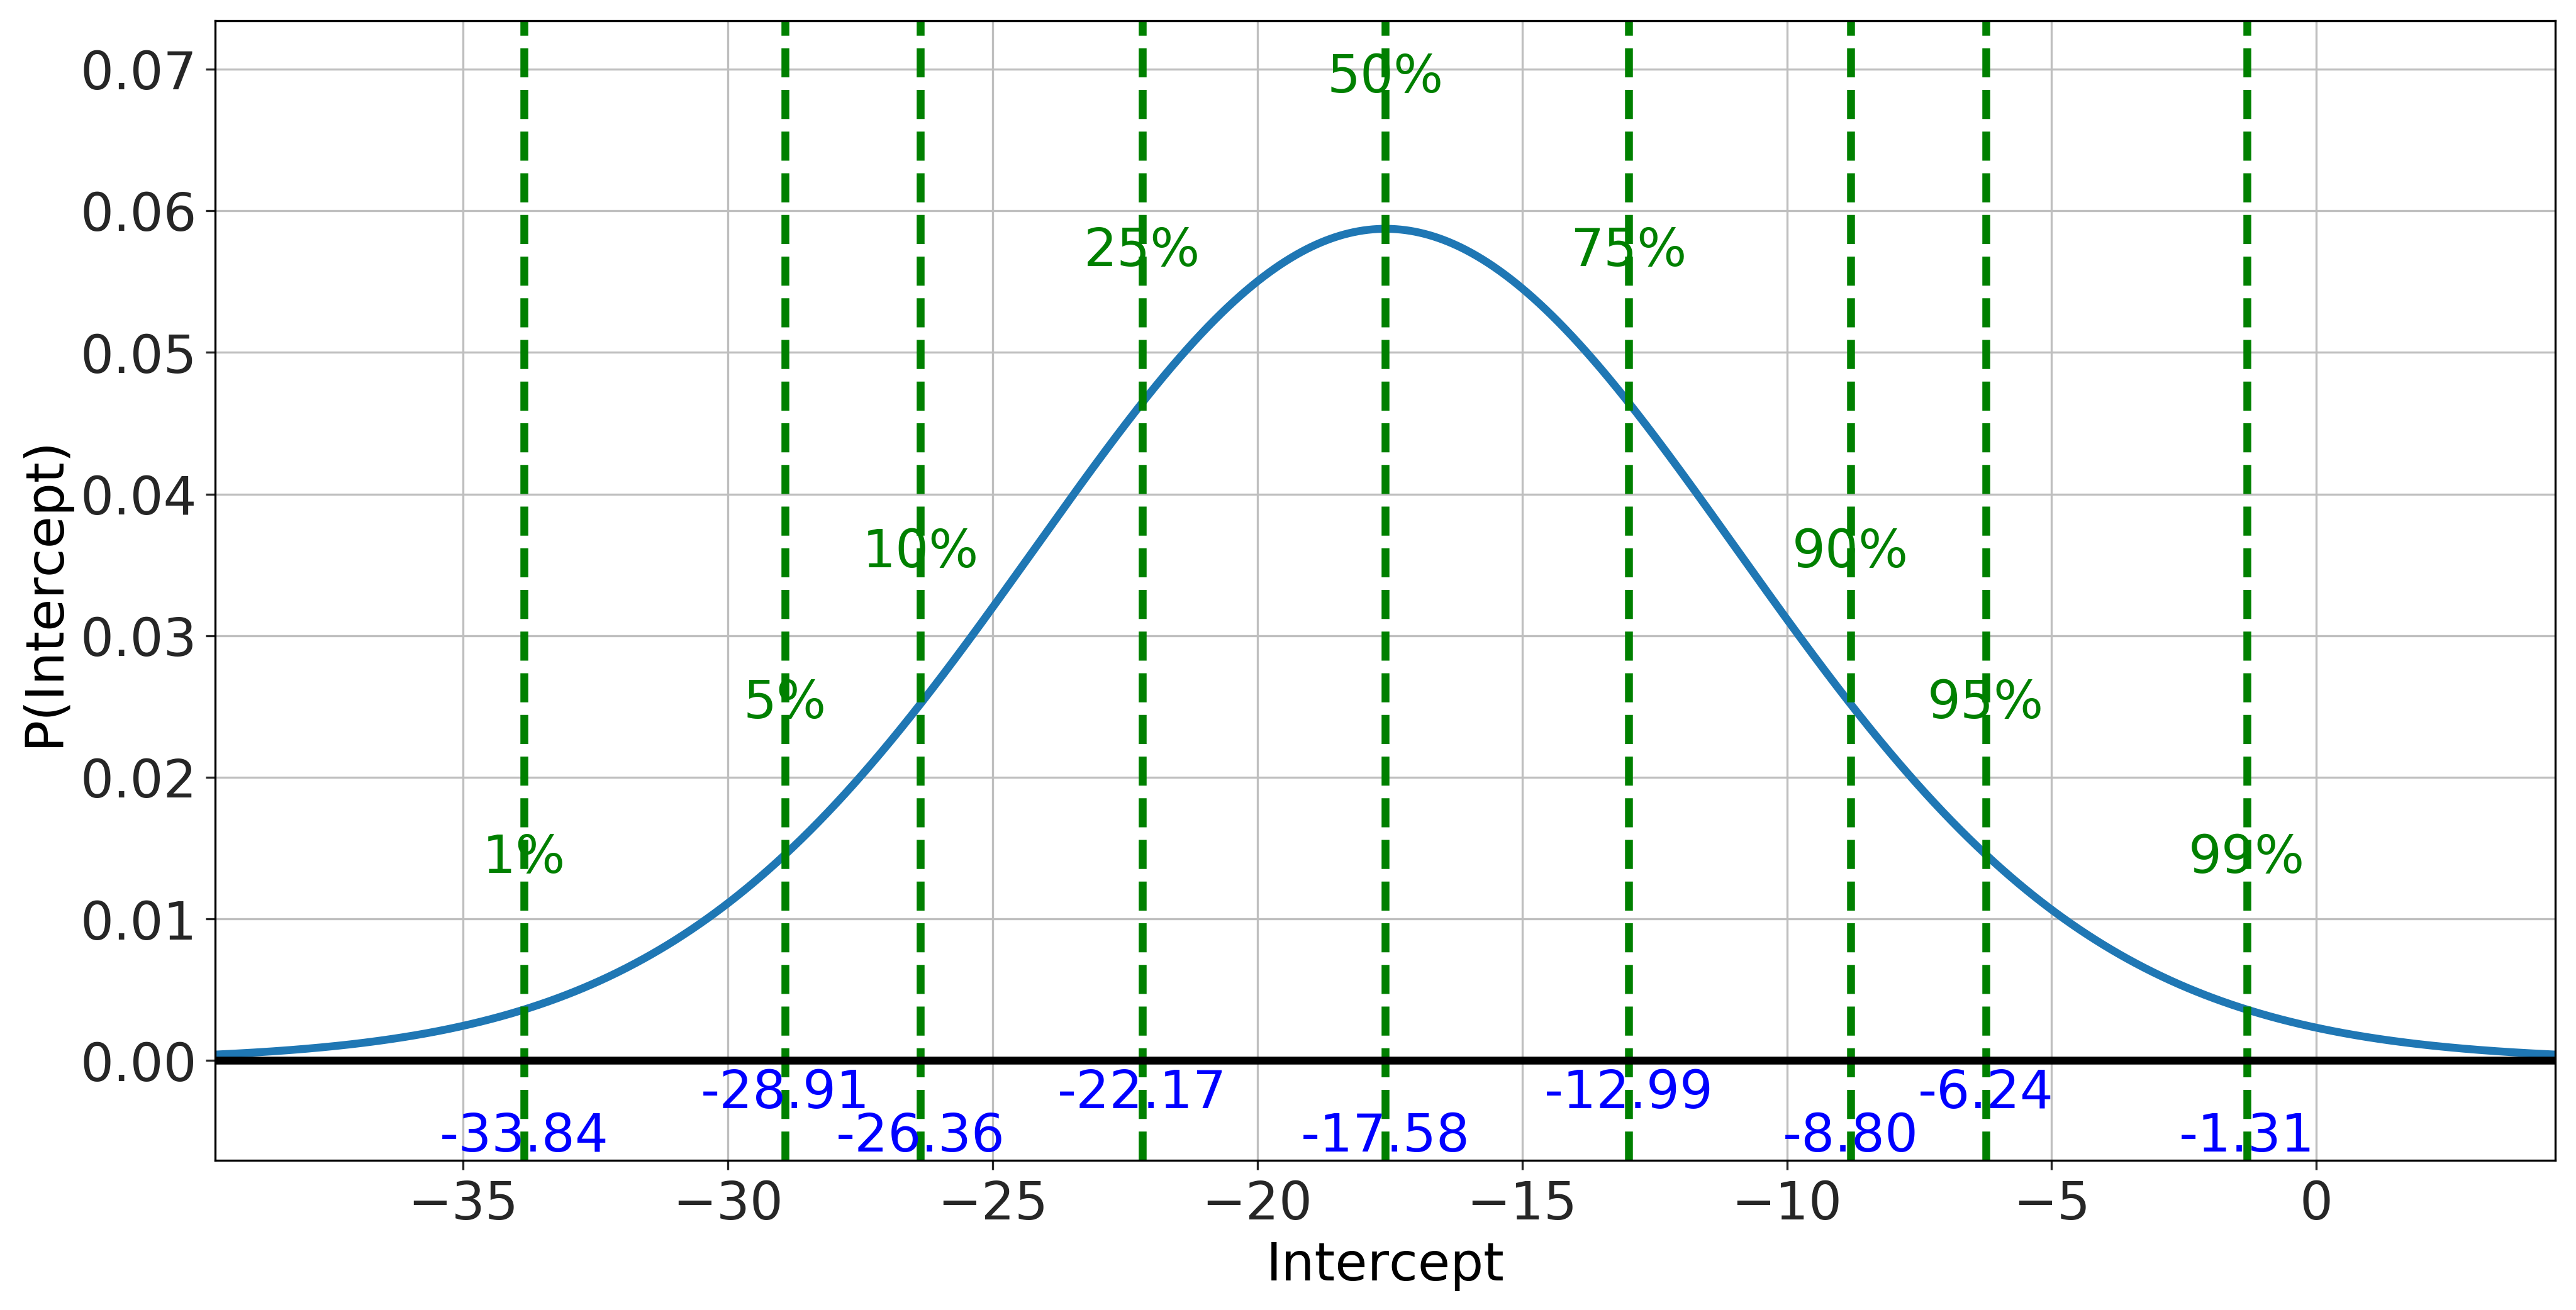

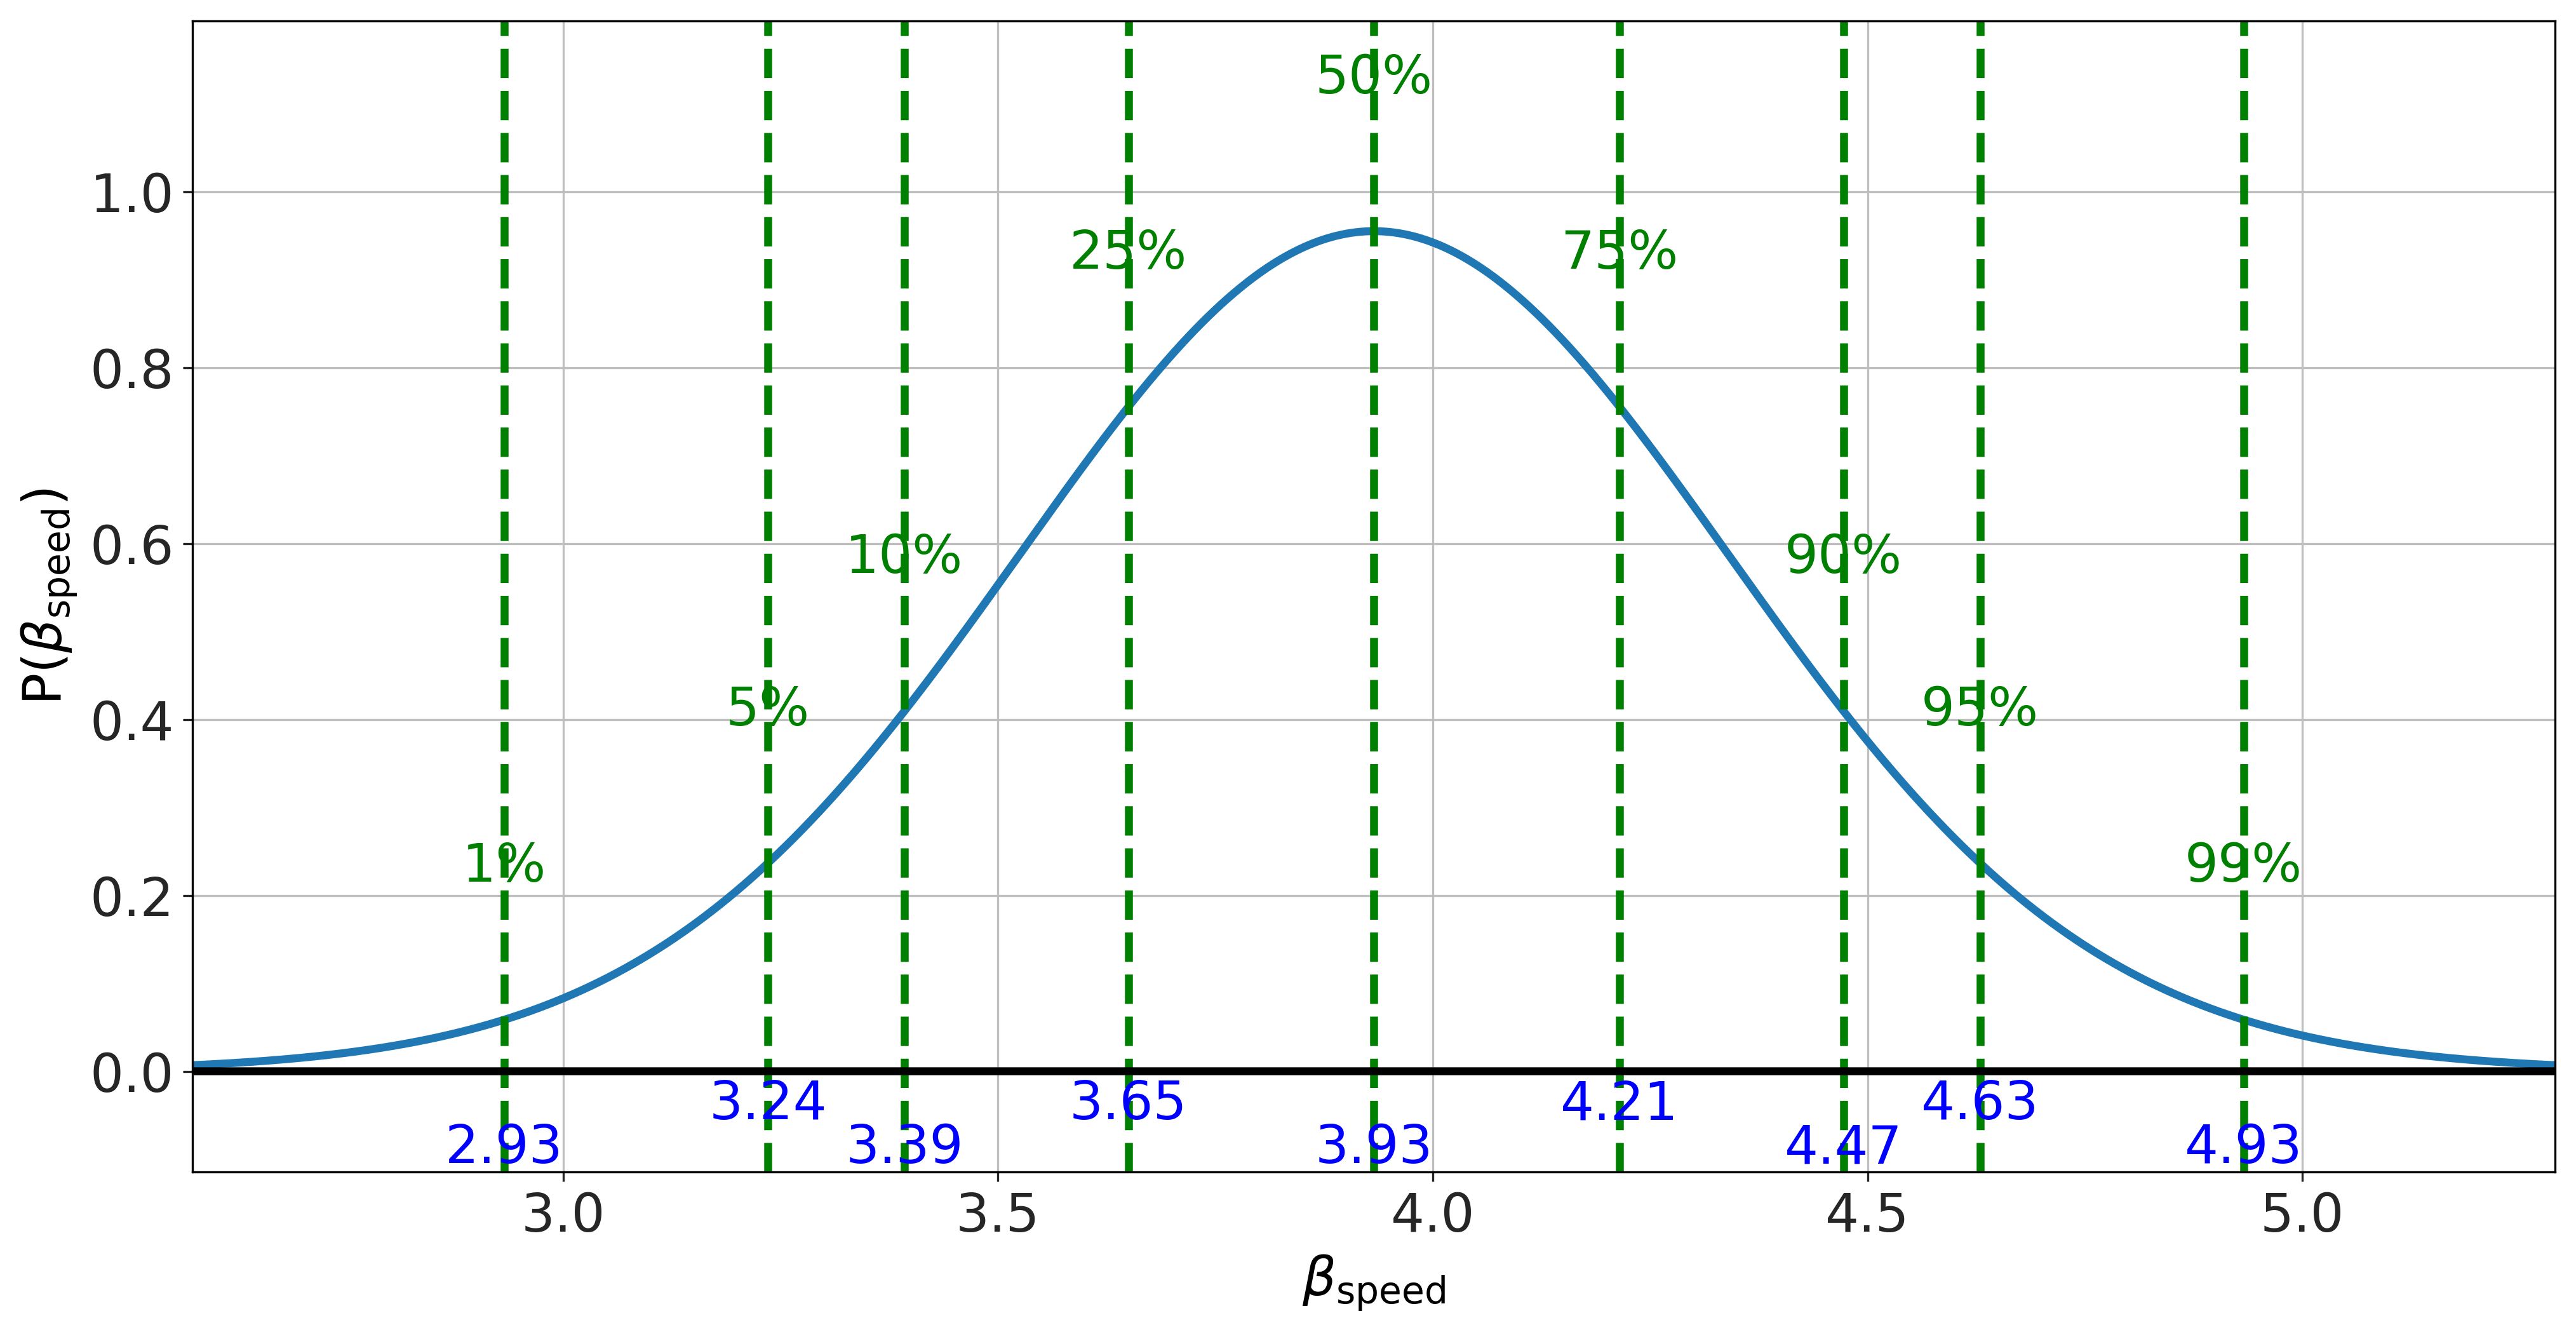

In [16]:
result_linear=regression('dist ~ speed',data)

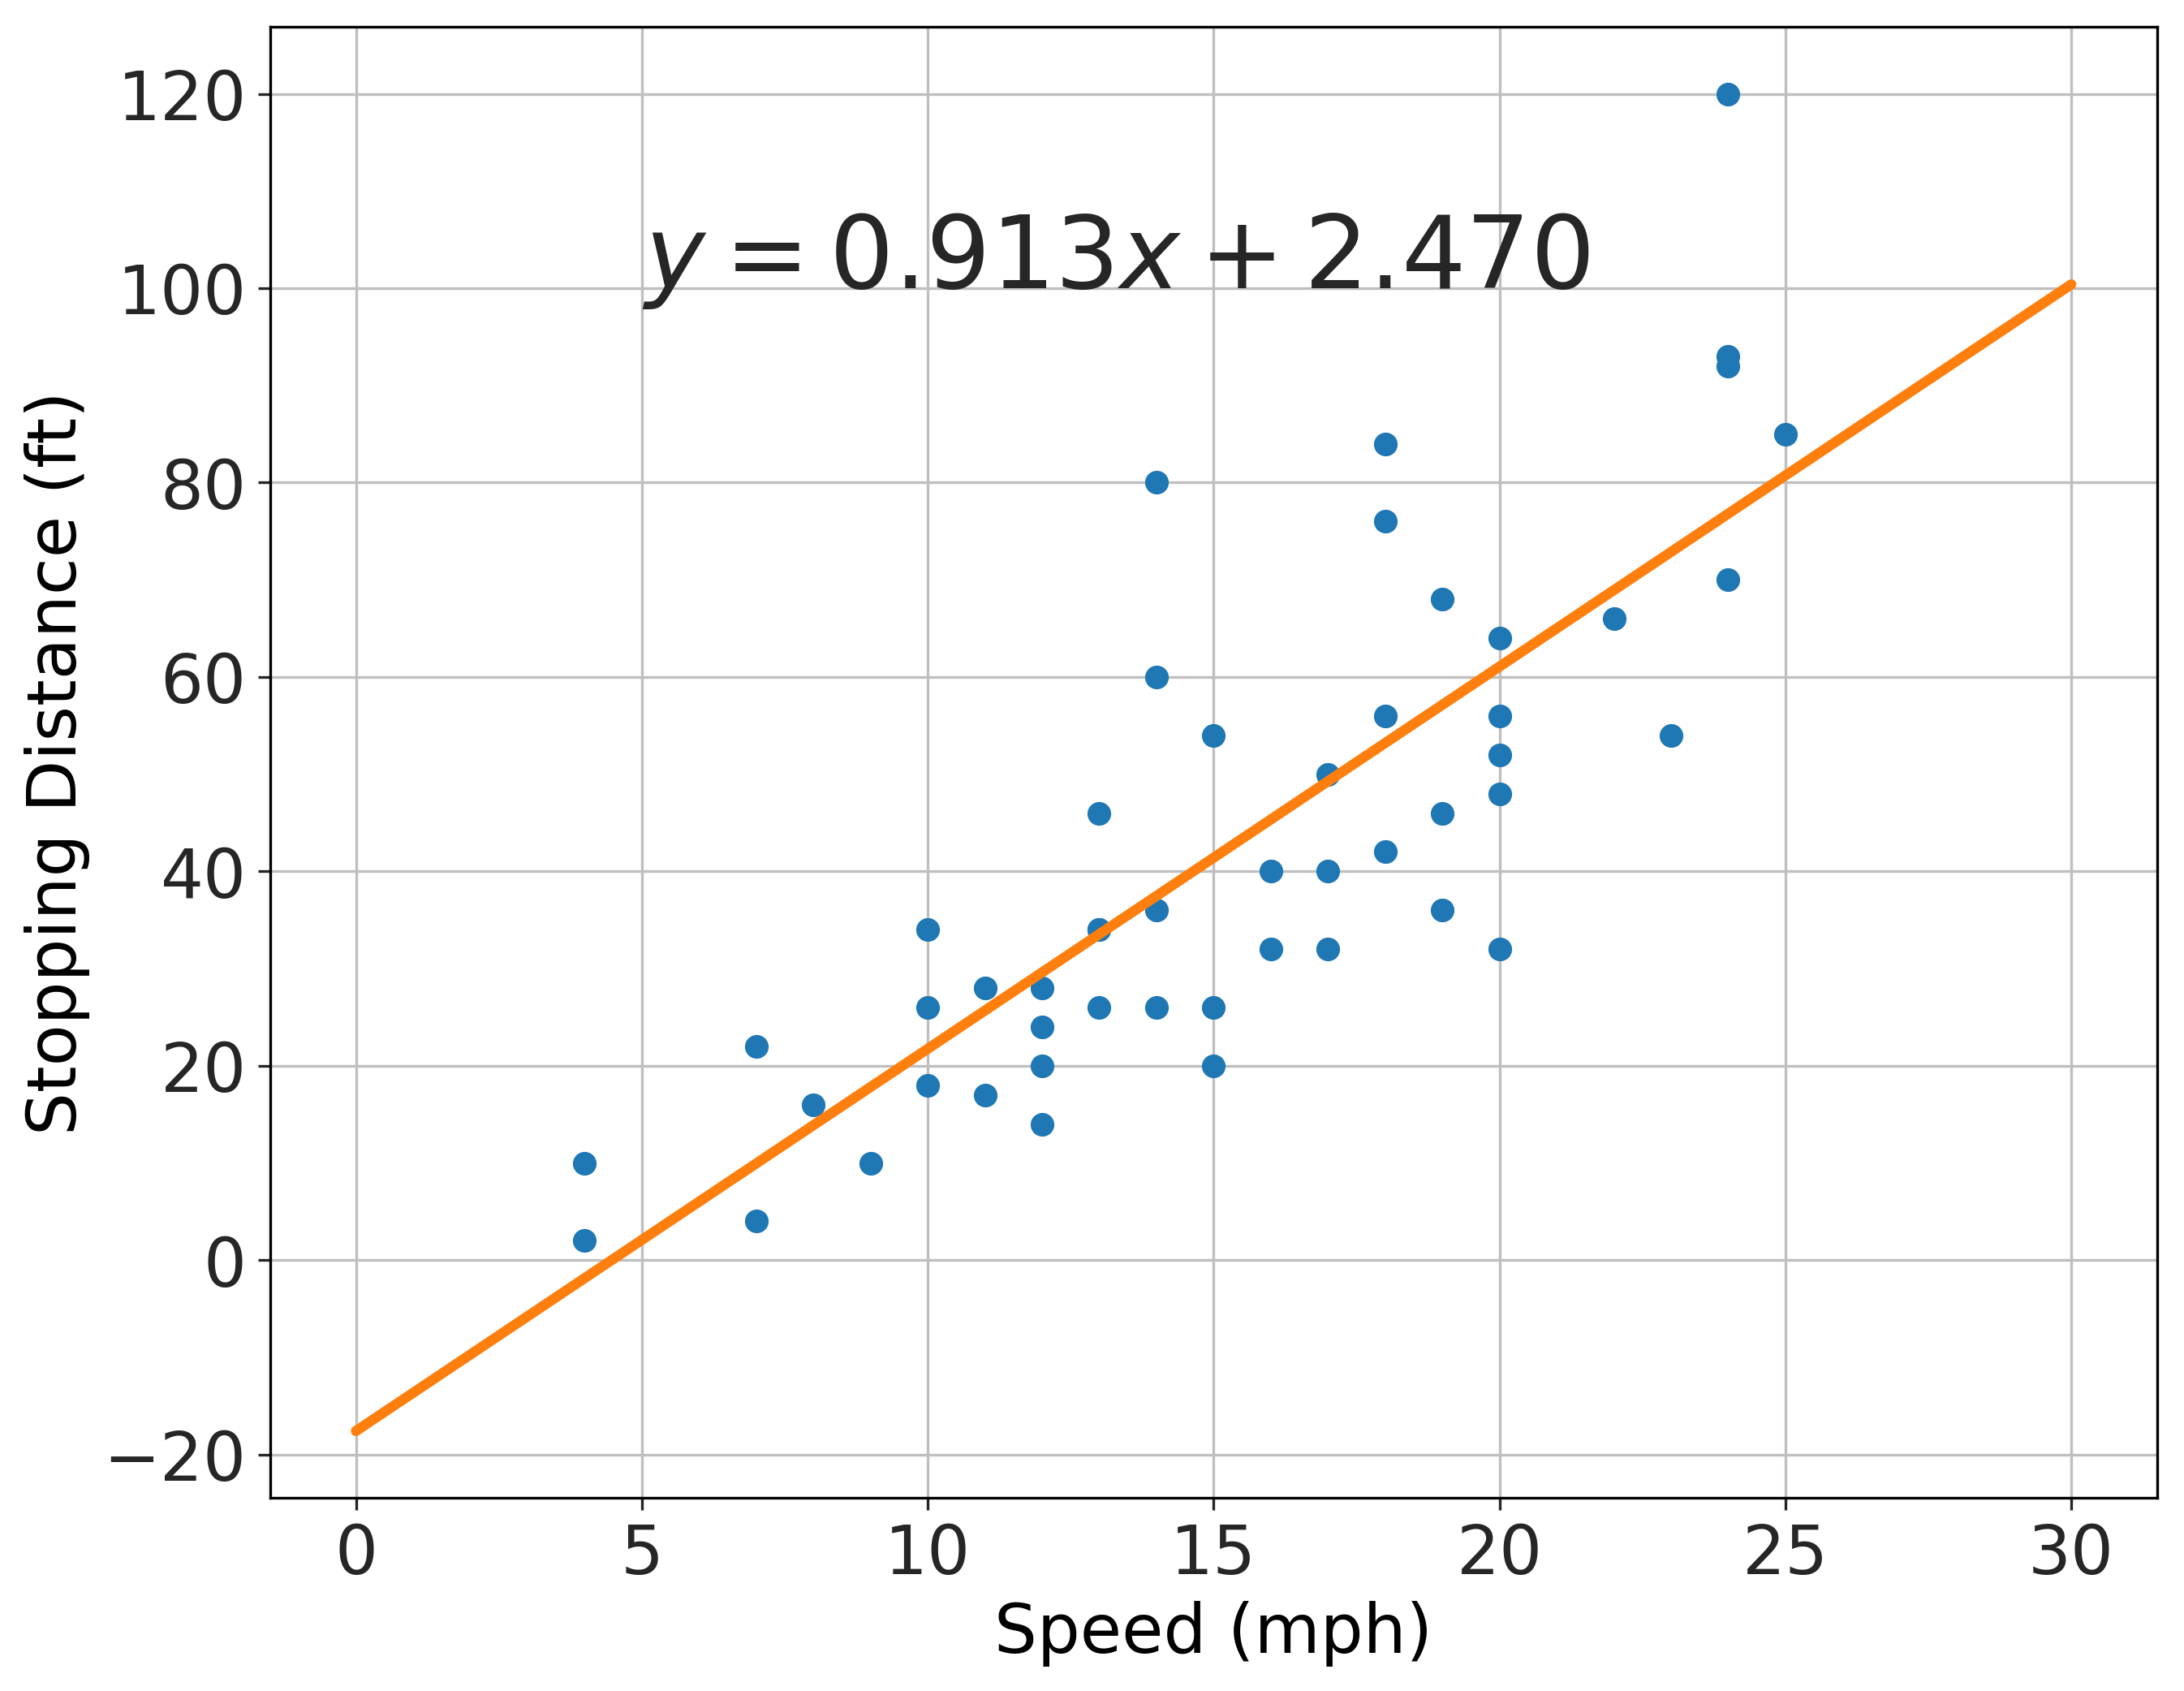

In [18]:
plot(data['speed'],data['dist'],'o')
ylabel('Stopping Distance (ft)')
xlabel('Speed (mph)')
h=linspace(0,30,10)
plot(h,result_linear['_Predict'](speed=h),'-')

b=result.Intercept.mean()
m=result.speed.mean()

if b>0:
    text(5,100,'$y=%.3f x + %.3f$' % (m,b),fontsize=30)
else:
    text(5,100,'$y=%.3f x %.3f$' % (m,b),fontsize=30)


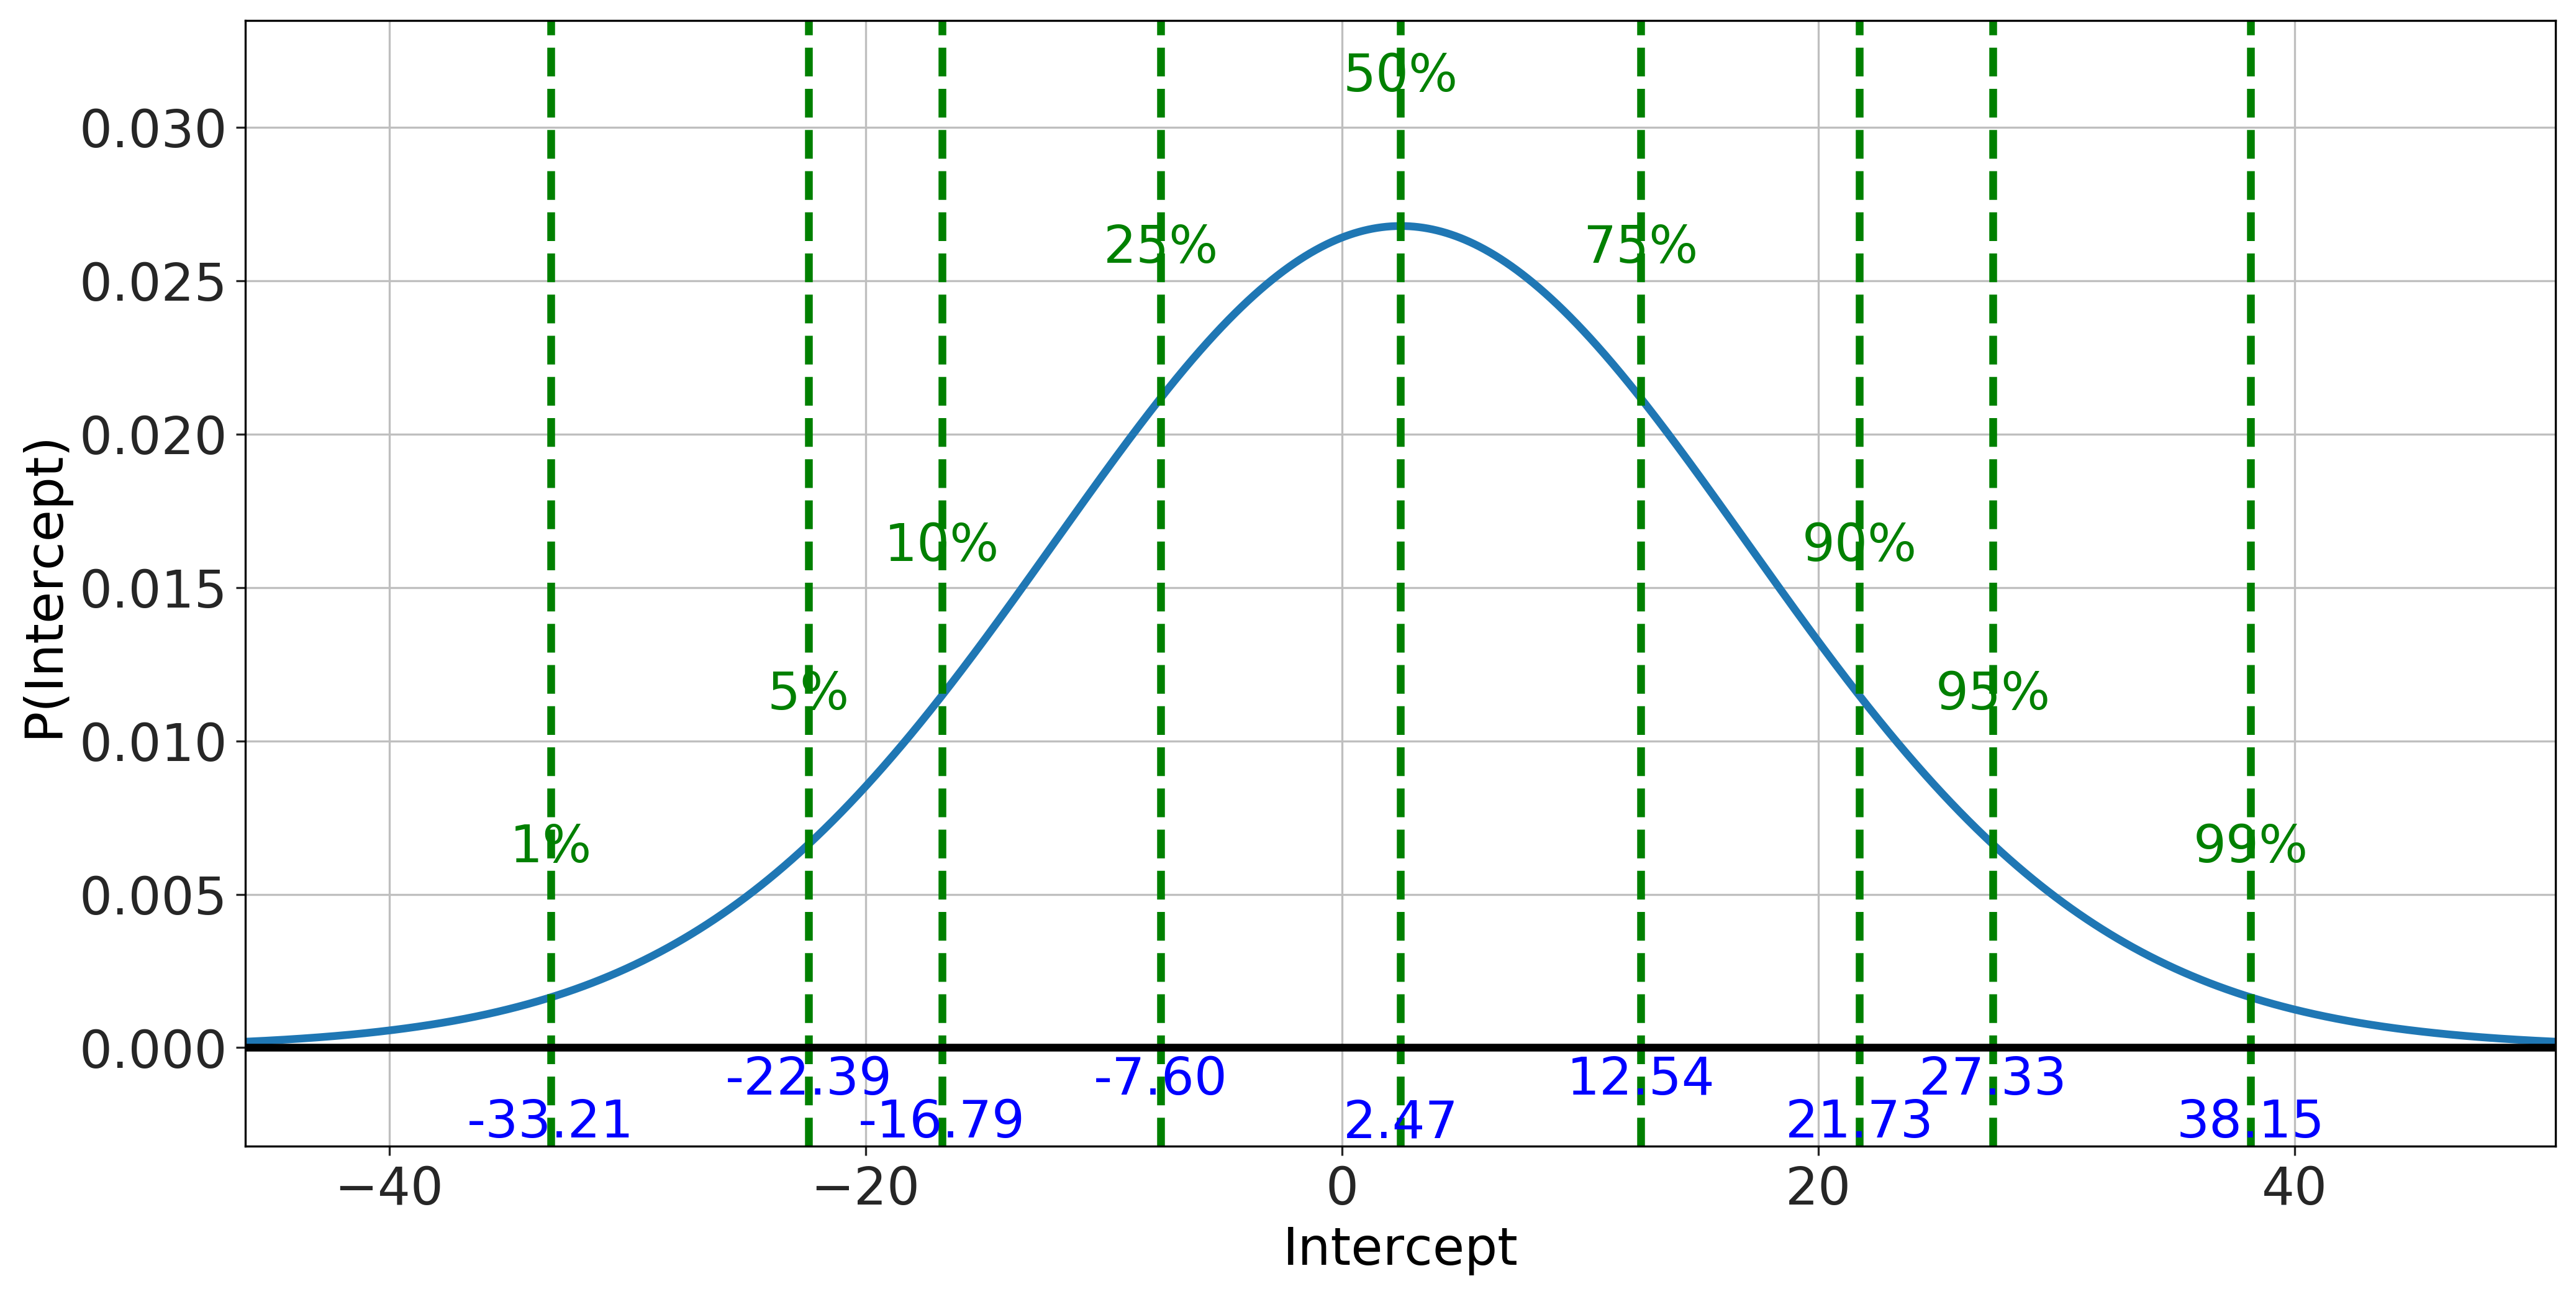

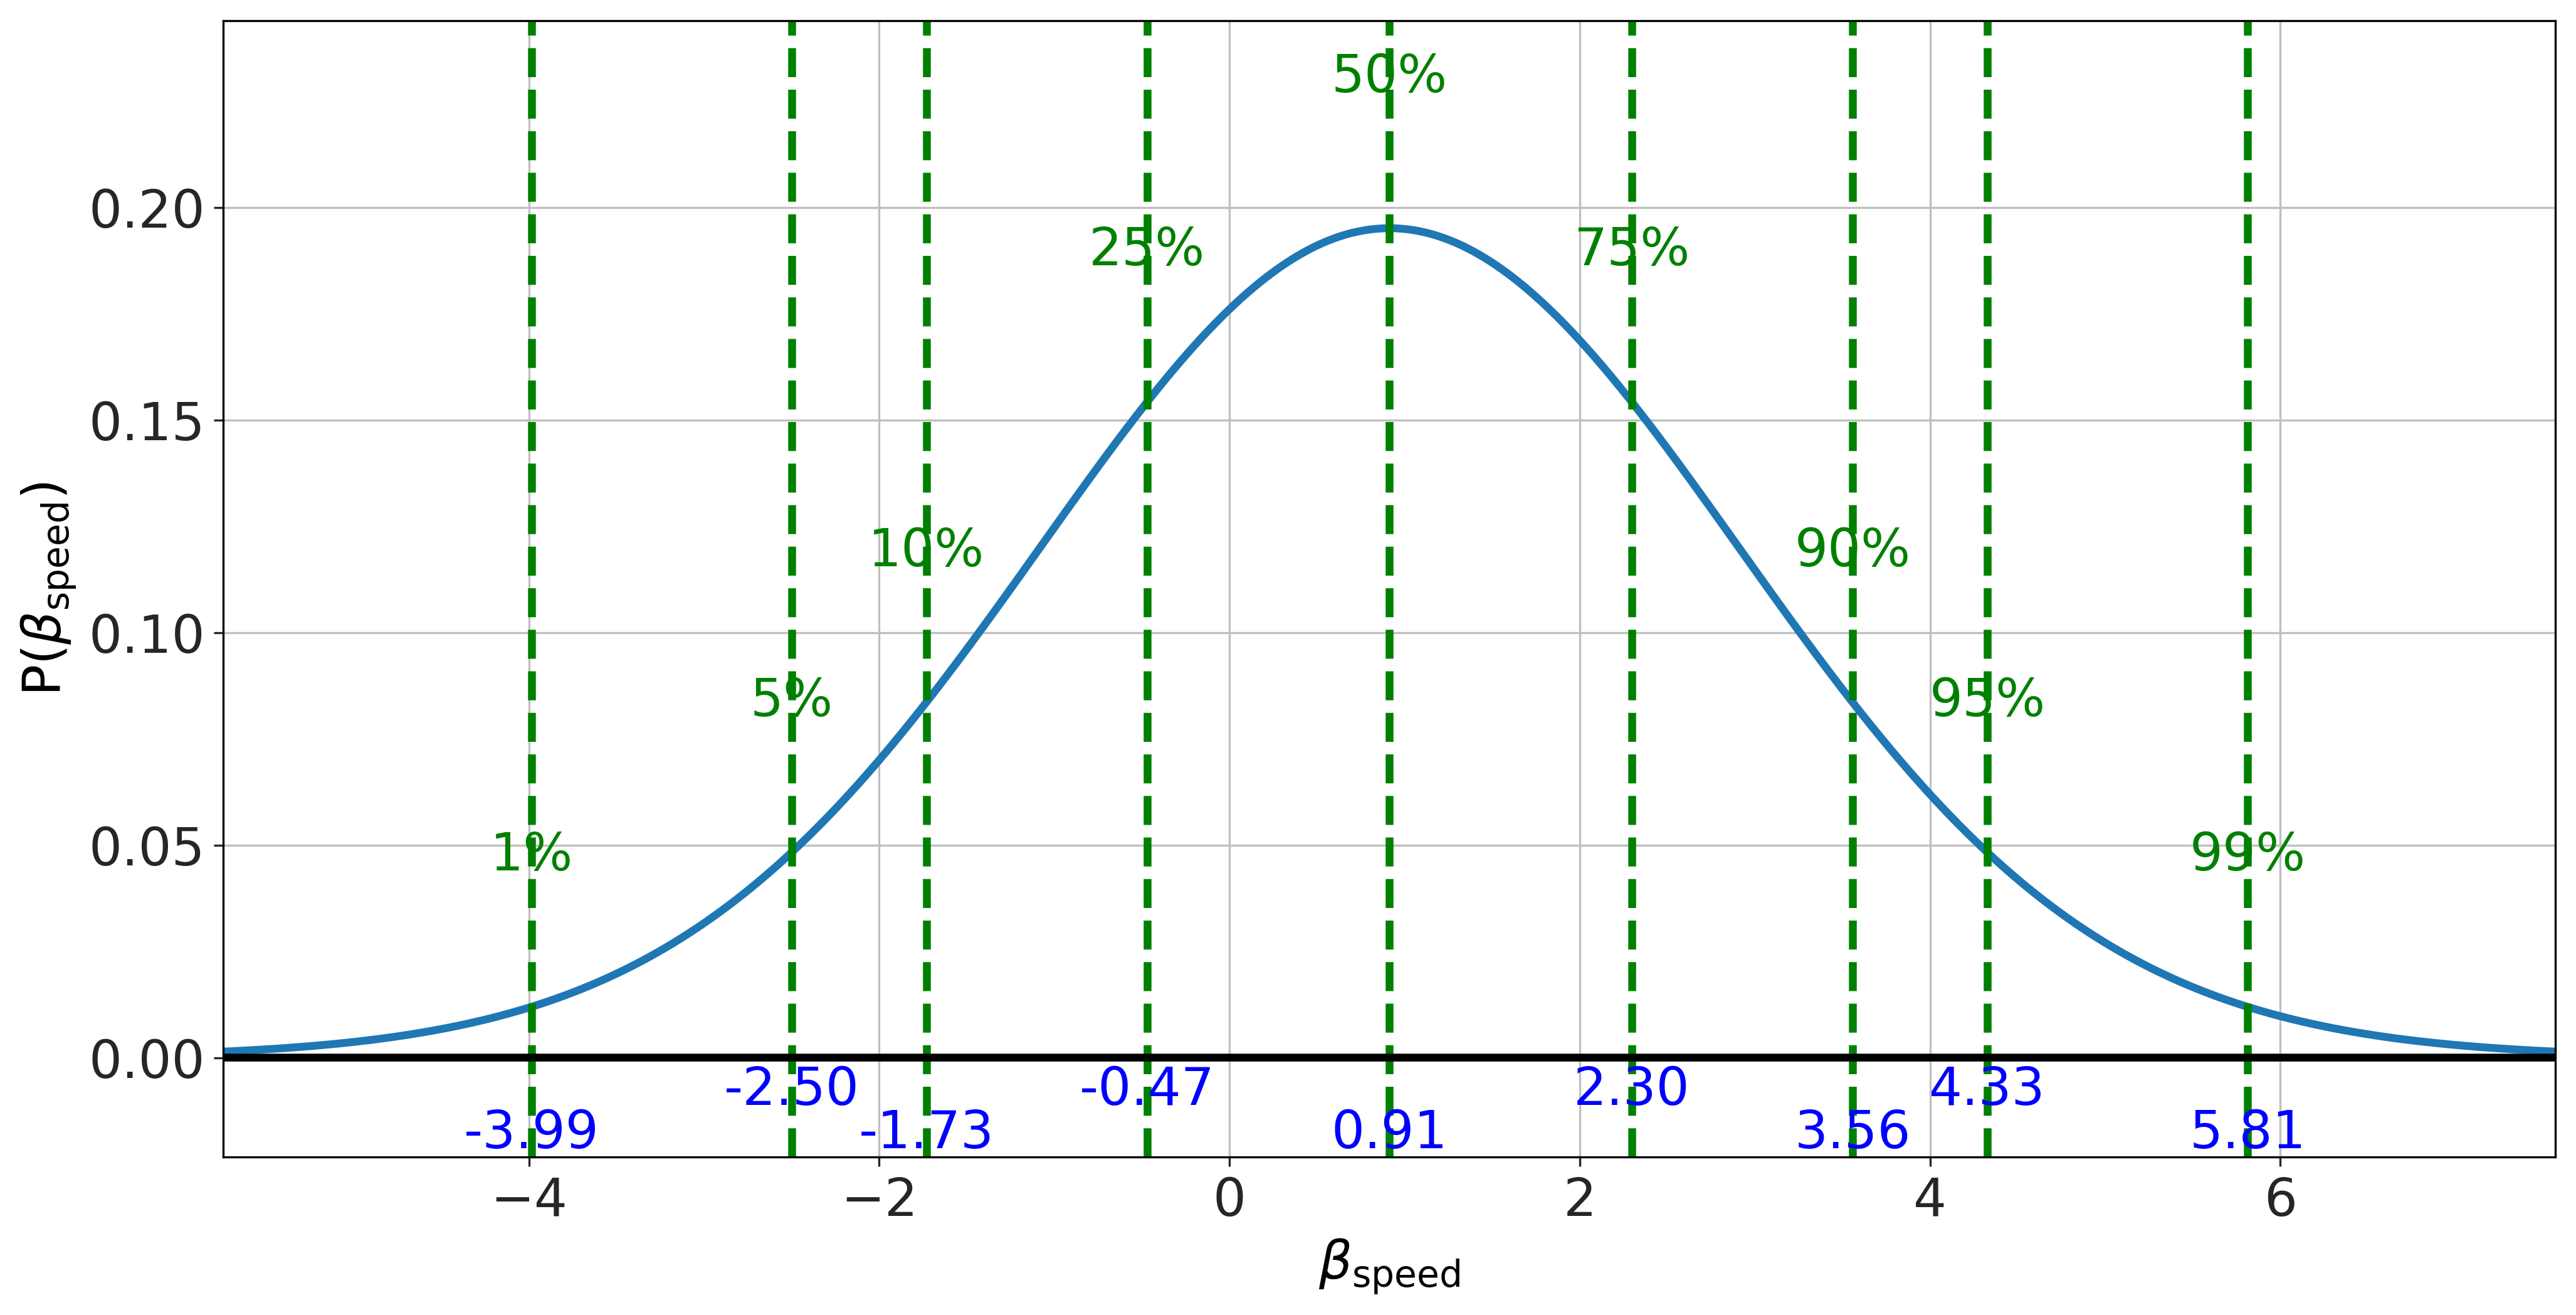

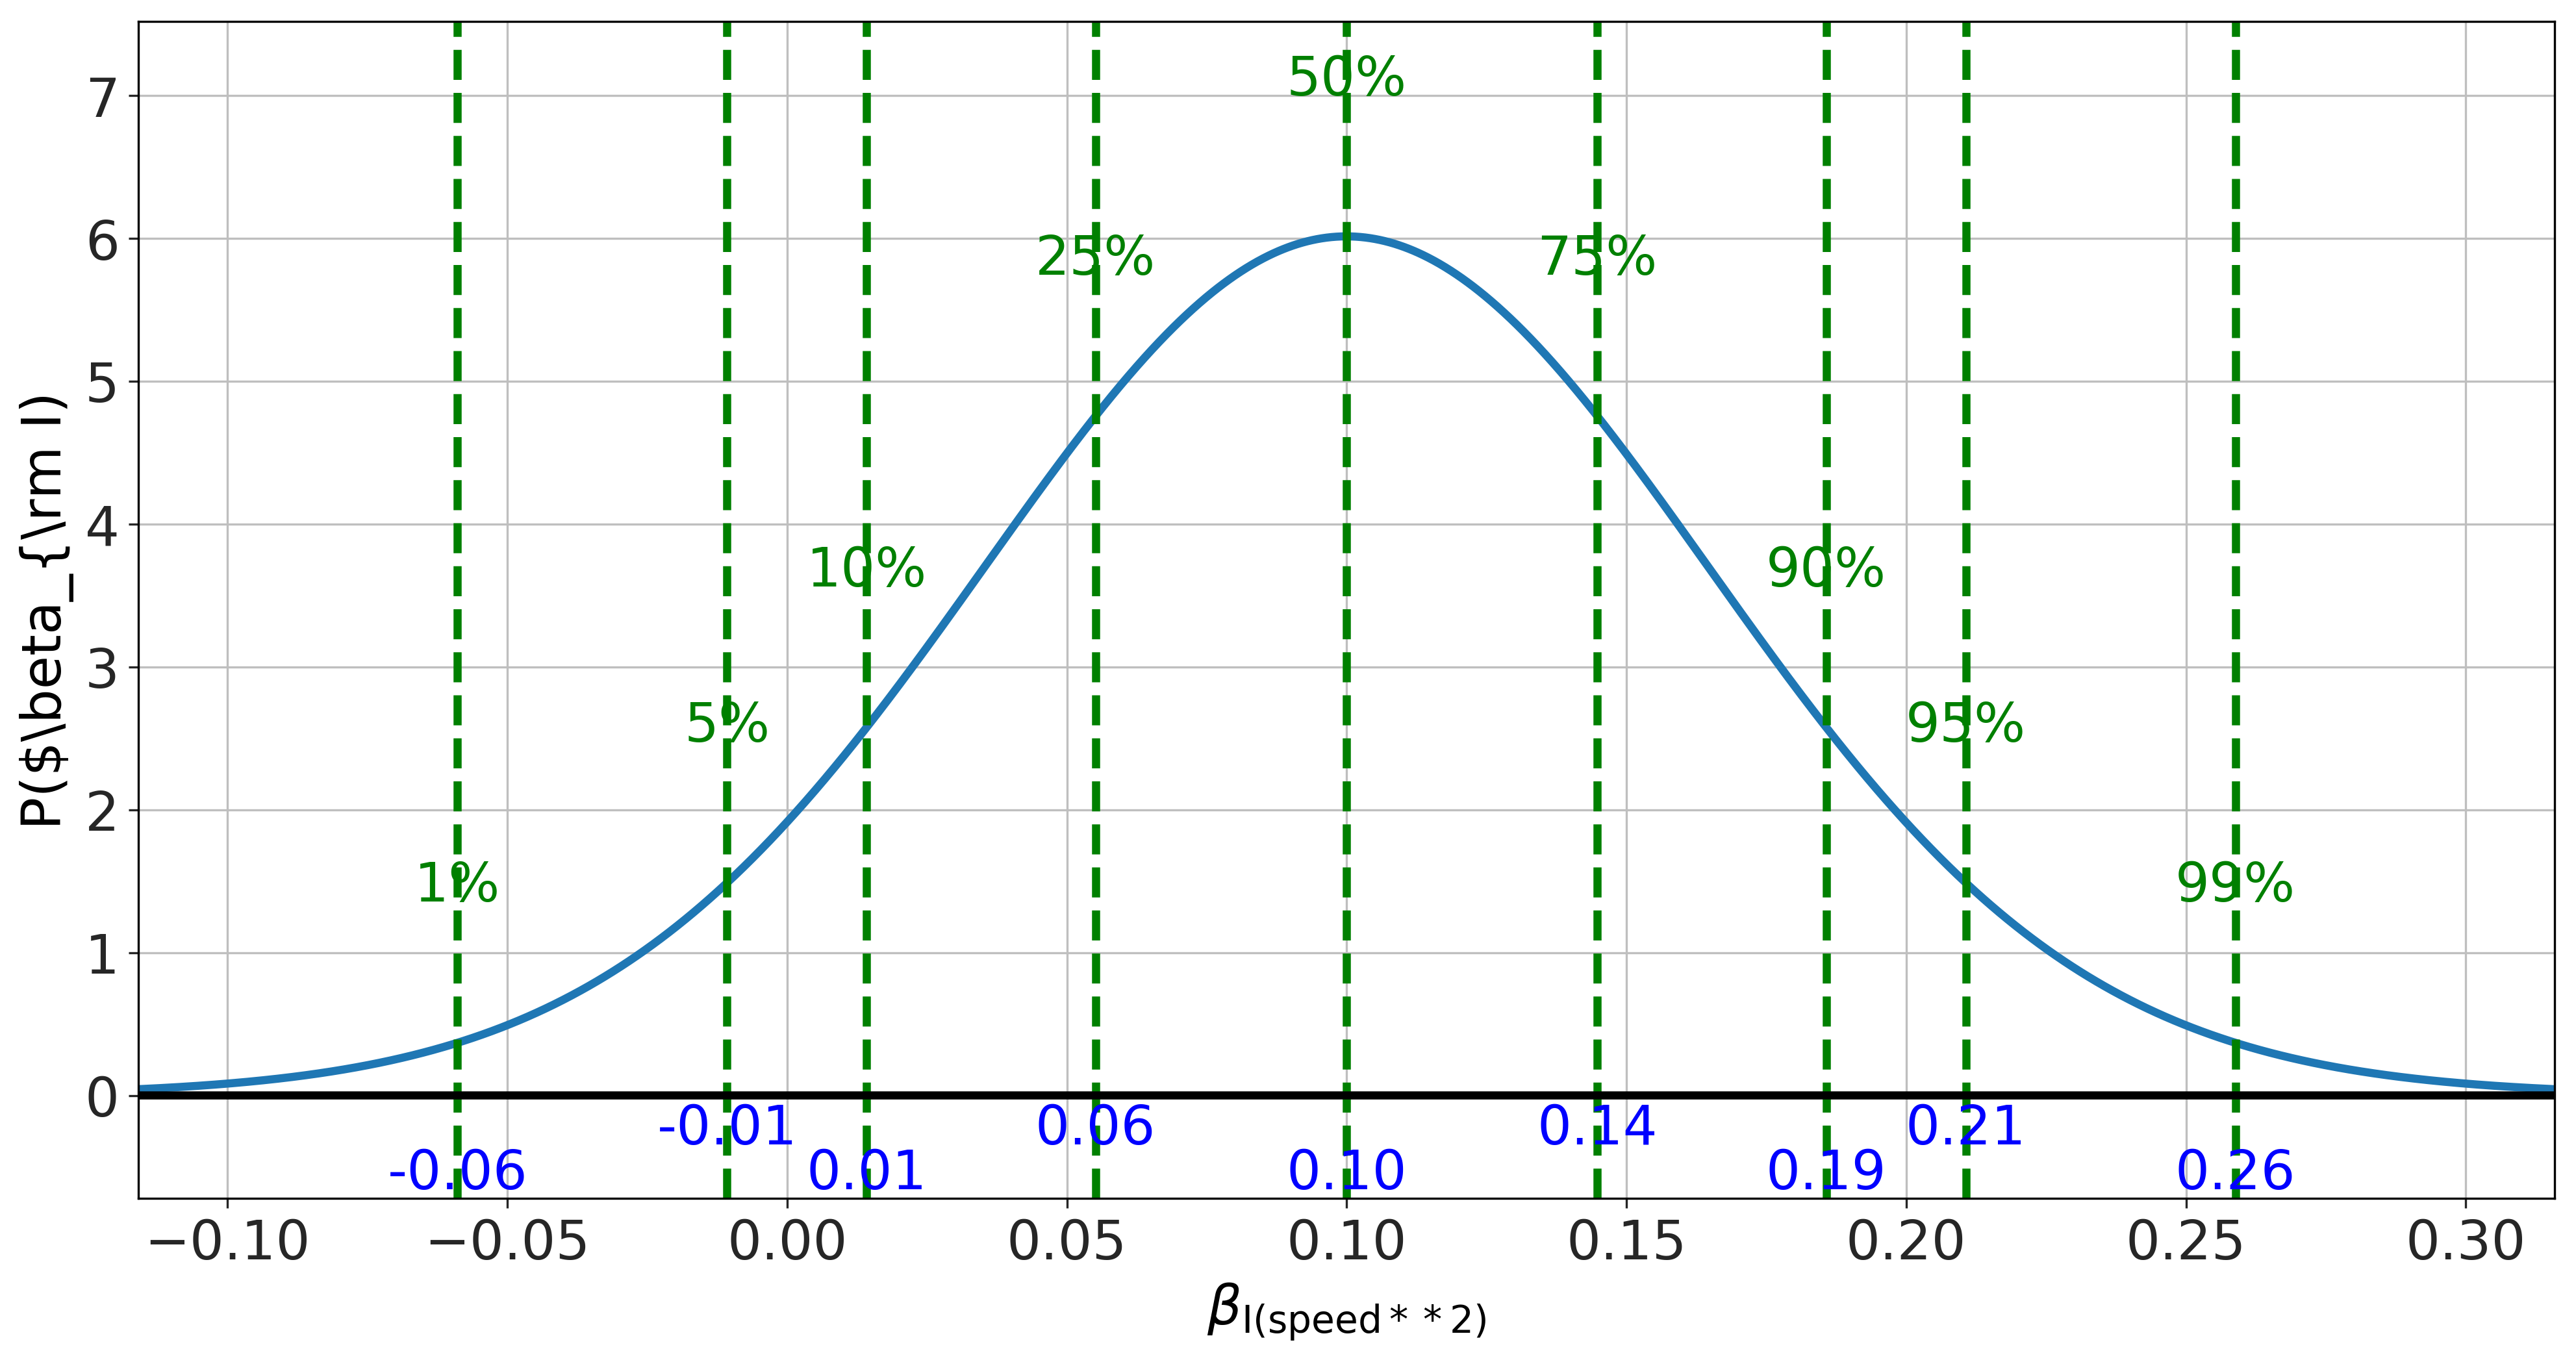

In [19]:
result_quadratic=regression('dist ~ speed + I(speed**2)',data)

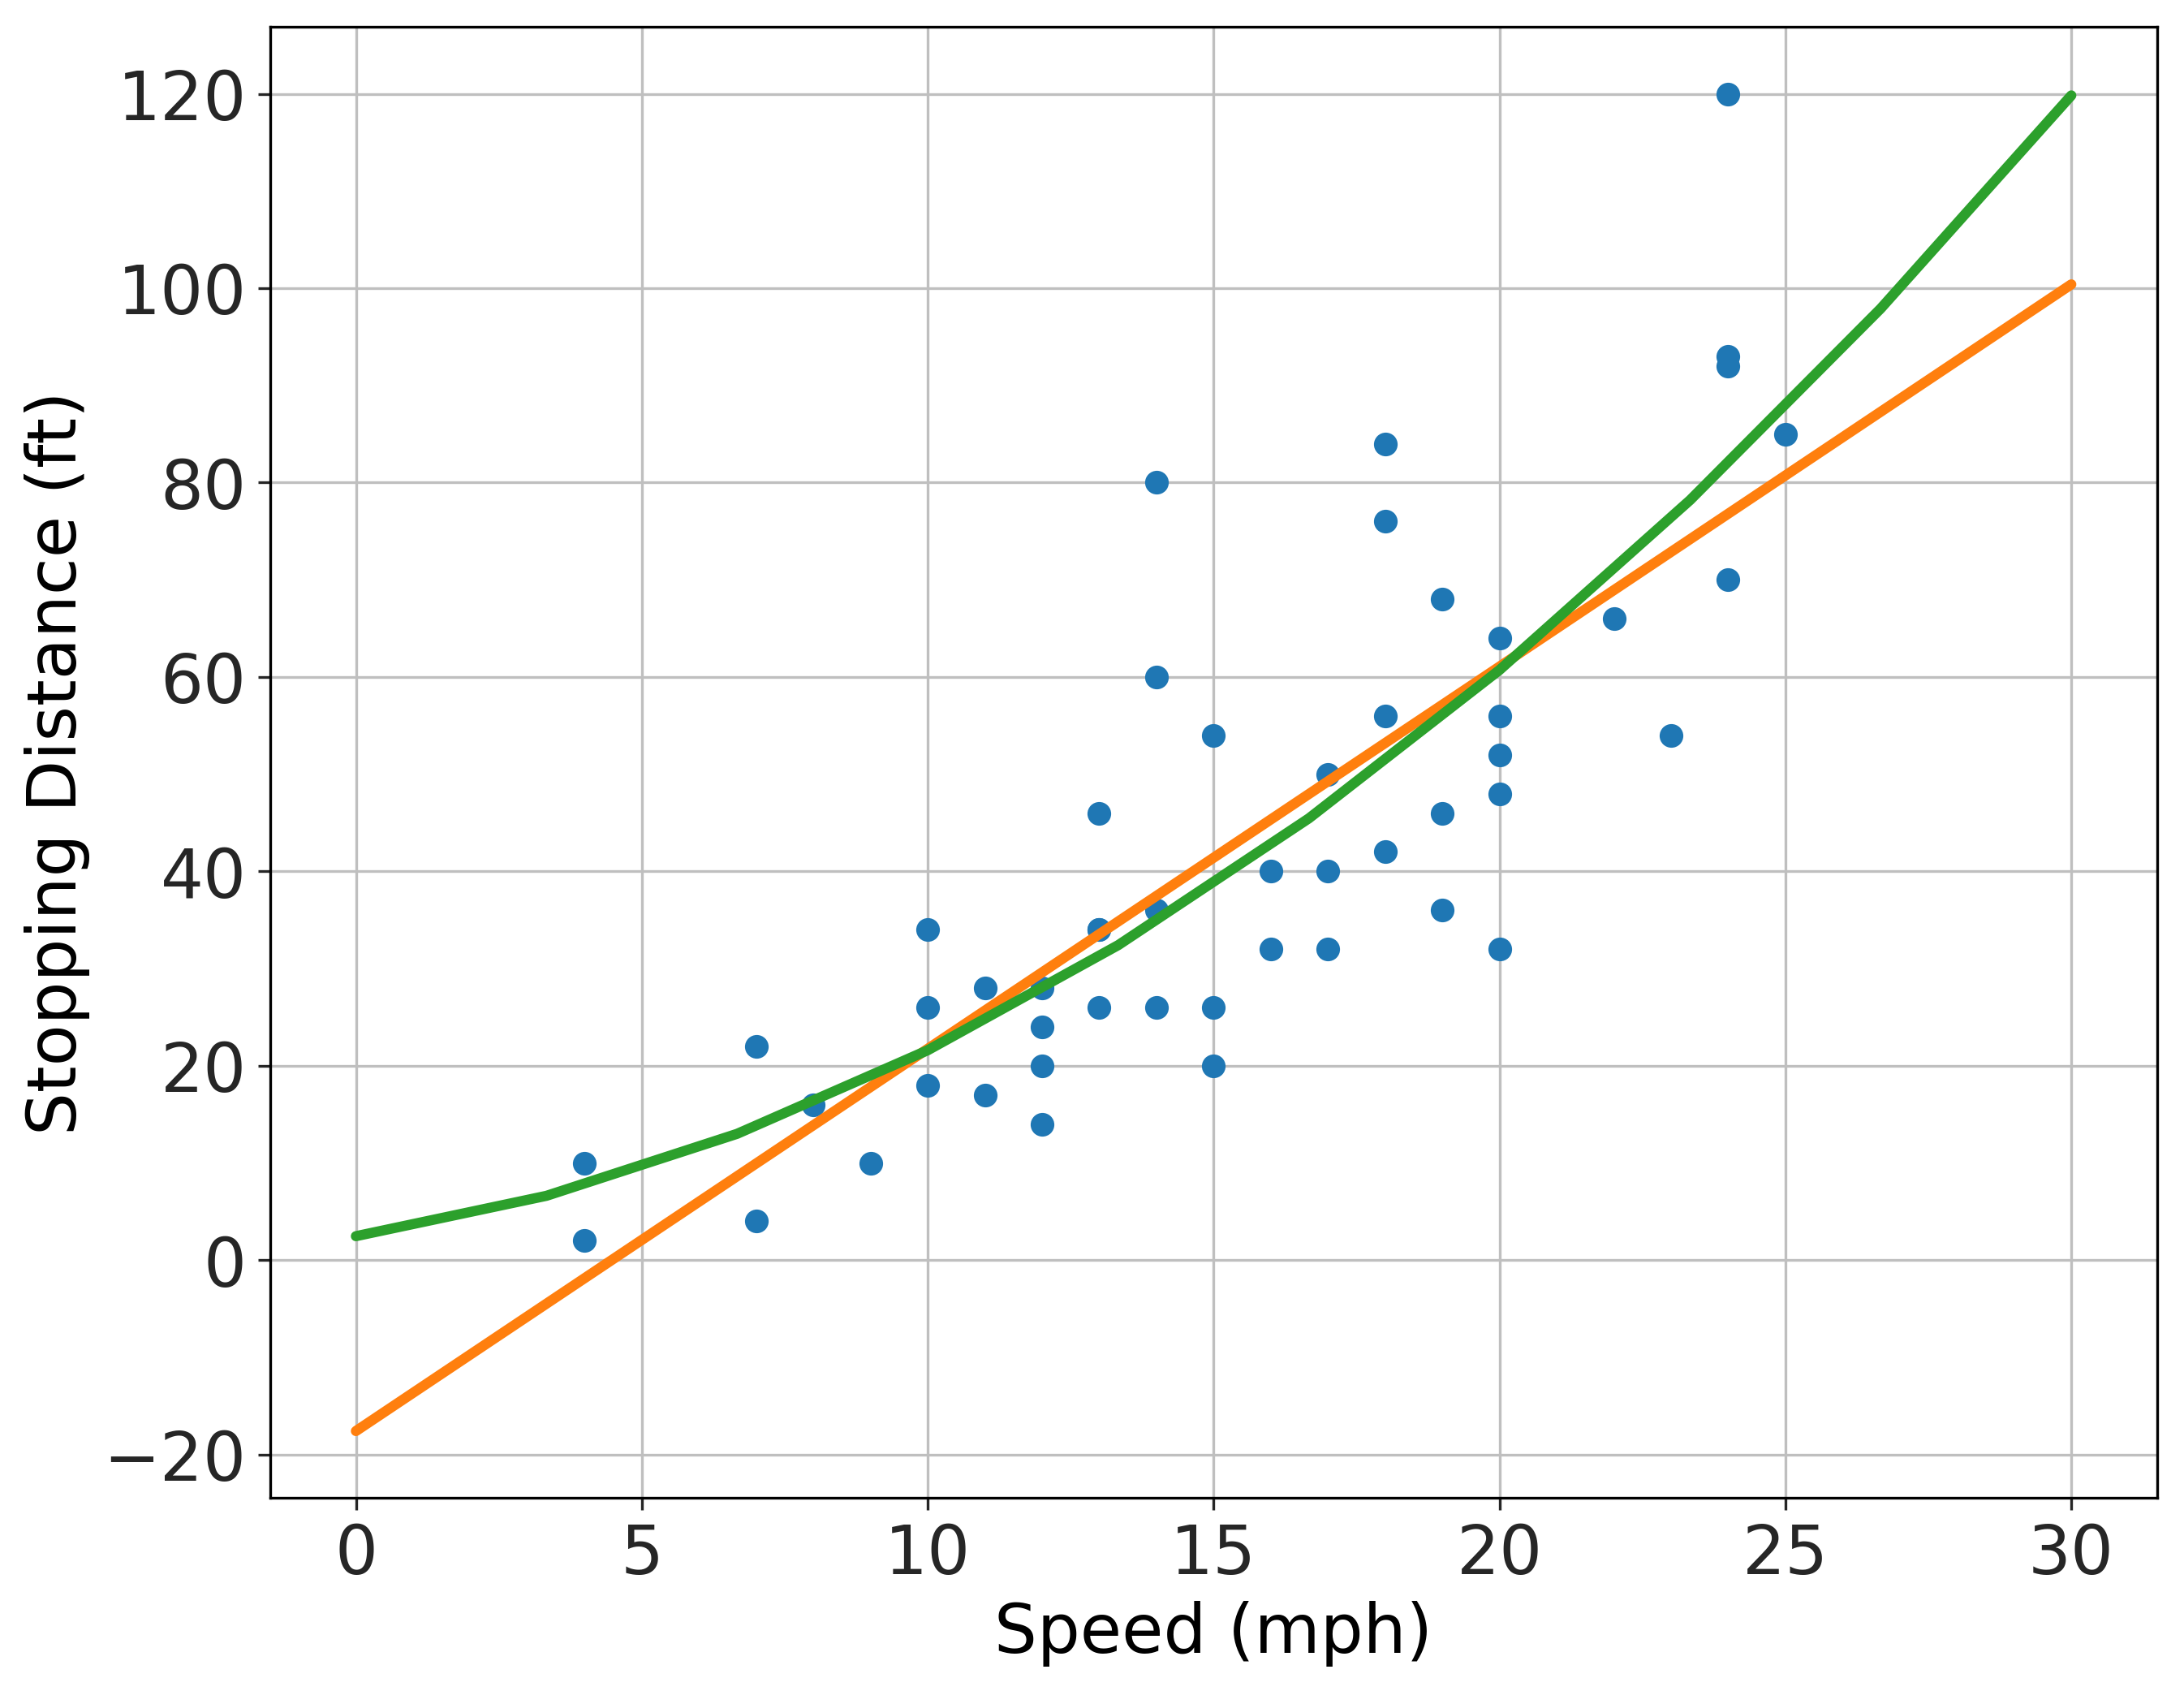

In [20]:
plot(data['speed'],data['dist'],'o')
ylabel('Stopping Distance (ft)')
xlabel('Speed (mph)')
h=linspace(0,30,10)
plot(h,result_linear['_Predict'](speed=h),'-')
plot(h,result_quadratic['_Predict'](speed=h),'-')


In [22]:
result_constant=regression('dist ~ 1',data,plot=False)
result_linear=regression('dist ~ speed ',data,plot=False)
result_quadratic=regression('dist ~ speed + I(speed**2)',data,plot=False)

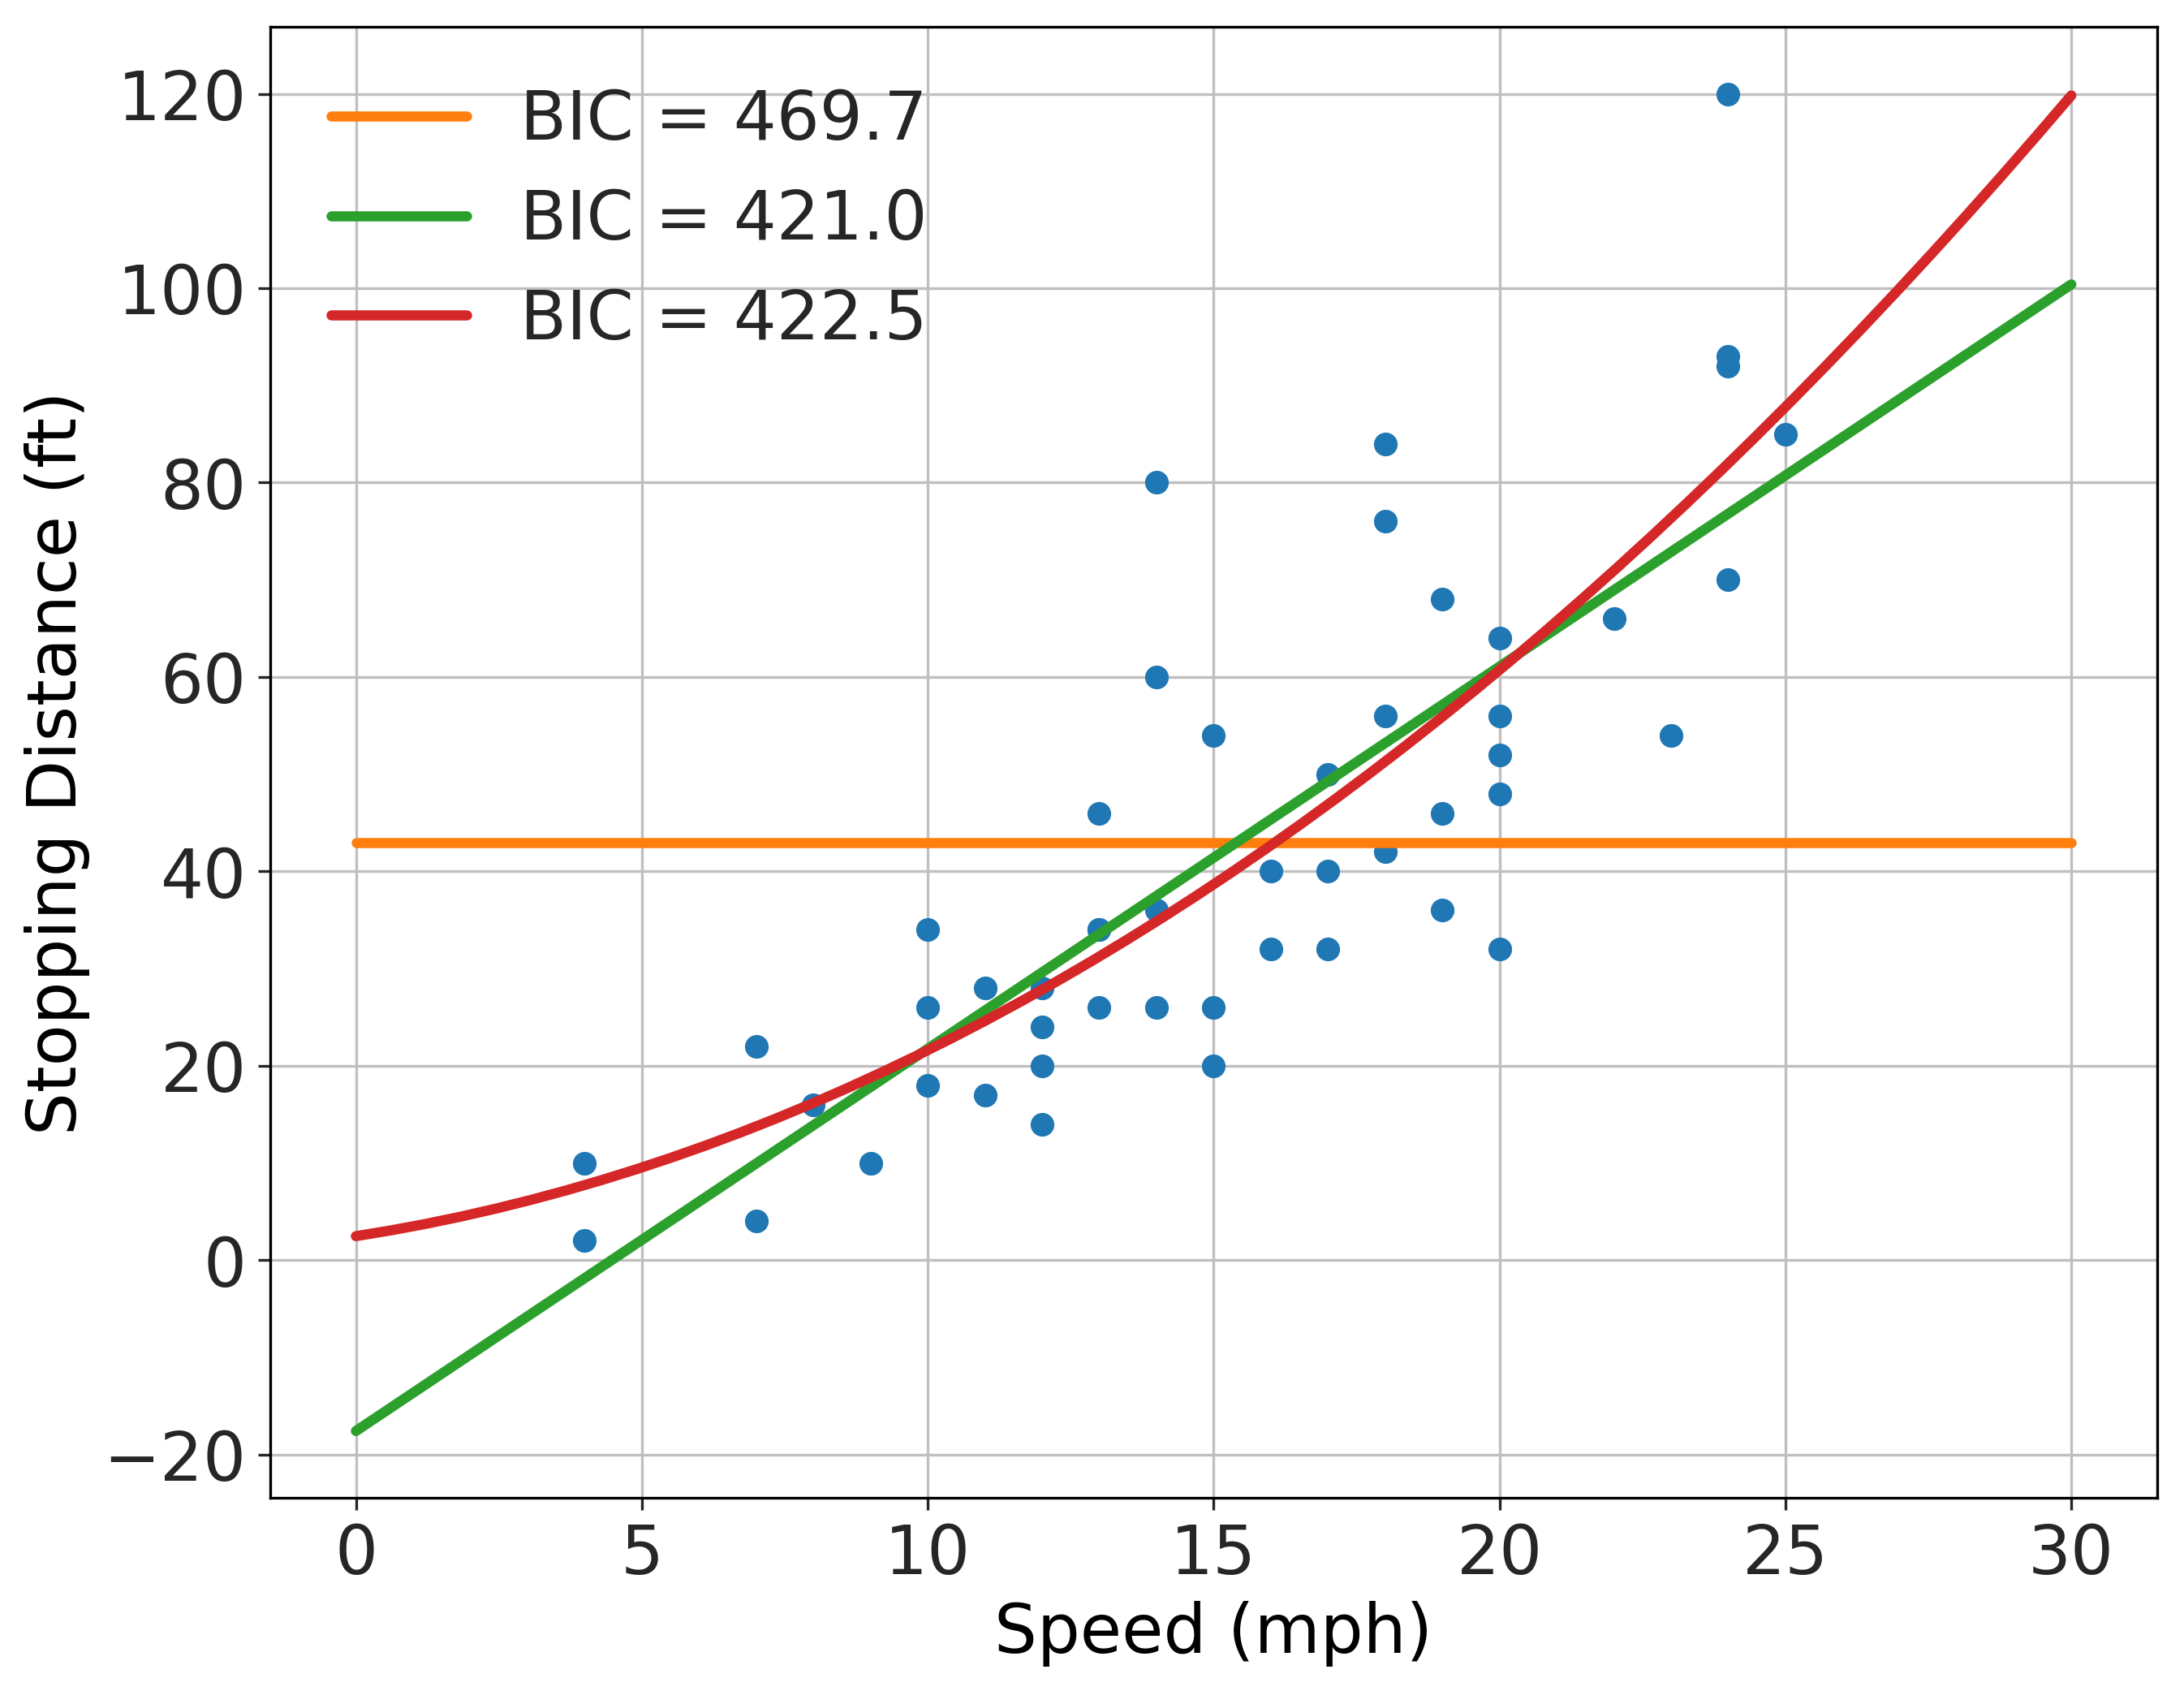

In [38]:
plot(data['speed'],data['dist'],'o',label='')
ylabel('Stopping Distance (ft)')
xlabel('Speed (mph)')
h=linspace(0,30,50)

for result in [result_constant,result_linear,result_quadratic]:
    plot(h,result['_Predict'](speed=h),'-',label='BIC = %.1f' % result._Fit_Results.bic)
legend()

In [56]:
result._Fit_Results.mse_total

664.0608163265307

In [41]:
n=len(data)
k=3

In [45]:
n*log(result._Fit_Results.mse_resid)+k*log(n)

283.7080543523394

In [46]:
(-2 * result._Fit_Results.llf + np.log(result._Fit_Results.nobs) * (result._Fit_Results.df_model +
                                                     result._Fit_Results.k_constant))

422.5081374869023

In [48]:
np.log(result._Fit_Results.nobs),np.log(n)

(3.912023005428146, 3.912023005428146)

In [50]:
result._Fit_Results.df_model +result._Fit_Results.k_constant

3.0

In [51]:
result._Fit_Results.llf

-205.38603423530893

In [60]:
sum((result['_Predict'](speed=data['speed'])-data['dist'])**2),result._Fit_Results.ssr

(10824.715907669994, 10824.715907669995)

In [65]:
sum((result['_Predict'](speed=data['speed'])-data['dist'])**2)/n,result._Fit_Results.mse_total

(216.49431815339986, 664.0608163265307)

In [58]:
-2 * result._Fit_Results.llf

410.77206847061785

In [66]:
mse=sum((result['_Predict'](speed=data['speed'])-data['dist'])**2)/n

In [73]:
n*log(mse)+k*log(n)

280.614284166435

In [72]:
result._Fit_Results.ssr/n

216.49431815339992

In [74]:
mse

216.49431815339986

In [80]:
n + n*log(2*pi) + n *log(mse) + k*log( n)

422.5081374869023